In [558]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import time

from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, learning_curve, KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_completeness_v_measure, mean_squared_error

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

random_state = 5

## Phishing Websites

In [254]:
# https://archive.ics.uci.edu/ml/datasets/phishing+websites
phishing_dataset = pd.read_csv('phishing_websites.csv') 

# https://note.nkmk.me/en/python-pandas-len-shape-size/
phishing_dataset.drop(columns=phishing_dataset.columns[0], 
        axis=1, 
        inplace=True)
print("# of Rows: ", len(phishing_dataset))
print("# of Columns: ", len(phishing_dataset.columns))

# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html
phishing_X = phishing_dataset.iloc[:,:-1]
phishing_Y = phishing_dataset.iloc[: , -1]
print("X Shape: ", phishing_X.shape)
print("Y Shape: ", phishing_Y.shape)
print("Classes Counts: ", phishing_Y.value_counts())

phishing_X_scaled = StandardScaler().fit_transform(phishing_X)

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# 30-70 split
phishing_X_train, phishing_X_test, phishing_Y_train, phishing_Y_test = train_test_split(phishing_X_scaled, phishing_Y, test_size=0.30, random_state=5)
print("X Train Shape: ", phishing_X_train.shape)
print("X Test Shape: ", phishing_X_test.shape)
print("Y Train Shape: ", phishing_Y_train.shape)
print("Y Test Shape: ", phishing_Y_test.shape)

phishing_dataset.head()

# of Rows:  11055
# of Columns:  31
X Shape:  (11055, 30)
Y Shape:  (11055,)
Classes Counts:   1    6157
-1    4898
Name: Result, dtype: int64
X Train Shape:  (7738, 30)
X Test Shape:  (3317, 30)
Y Train Shape:  (7738,)
Y Test Shape:  (3317,)


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


## Wine Quality

In [255]:
# https://archive.ics.uci.edu/ml/datasets/wine+quality
wine_dataset = pd.read_csv('wine_quality.csv')  
print("# of Rows: ", len(wine_dataset))
print("# of Columns: ", len(wine_dataset.columns))

# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html
wine_X = wine_dataset.iloc[:,:-1]
wine_Y = wine_dataset.iloc[: , -1]
print("X Shape: ", wine_X.shape)
print("Y Shape: ", wine_Y.shape)

wine_X_scaled = StandardScaler().fit_transform(wine_X)

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# 30-70 split
wine_X_train, wine_X_test, wine_Y_train, wine_Y_test = train_test_split(wine_X_scaled, wine_Y, test_size=0.30, random_state=5)
print("X Train Shape: ", wine_X_train.shape)
print("X Test Shape: ", wine_X_test.shape)
print("Y Train Shape: ", wine_Y_train.shape)
print("Y Test Shape: ", wine_Y_test.shape)

wine_dataset.head()

# of Rows:  1599
# of Columns:  12
X Shape:  (1599, 11)
Y Shape:  (1599,)
X Train Shape:  (1119, 11)
X Test Shape:  (480, 11)
Y Train Shape:  (1119,)
Y Test Shape:  (480,)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


For n_clusters = 2 The average silhouette_score is : 0.2367469189937111
For n_clusters = 3 The average silhouette_score is : 0.2305672436618071
For n_clusters = 4 The average silhouette_score is : 0.1267966516554554
For n_clusters = 5 The average silhouette_score is : 0.1066907823416631
For n_clusters = 6 The average silhouette_score is : 0.09317092639804732
For n_clusters = 7 The average silhouette_score is : 0.11380683258014743
For n_clusters = 8 The average silhouette_score is : 0.1058959034525699
For n_clusters = 9 The average silhouette_score is : 0.11333314051268087
For n_clusters = 10 The average silhouette_score is : 0.10026824839577432
For n_clusters = 11 The average silhouette_score is : 0.10421976458742681
For n_clusters = 12 The average silhouette_score is : 0.10654937959108991
For n_clusters = 13 The average silhouette_score is : 0.10607454698067756
For n_clusters = 14 The average silhouette_score is : 0.11046806651773229
For n_clusters = 15 The average silhouette_score is

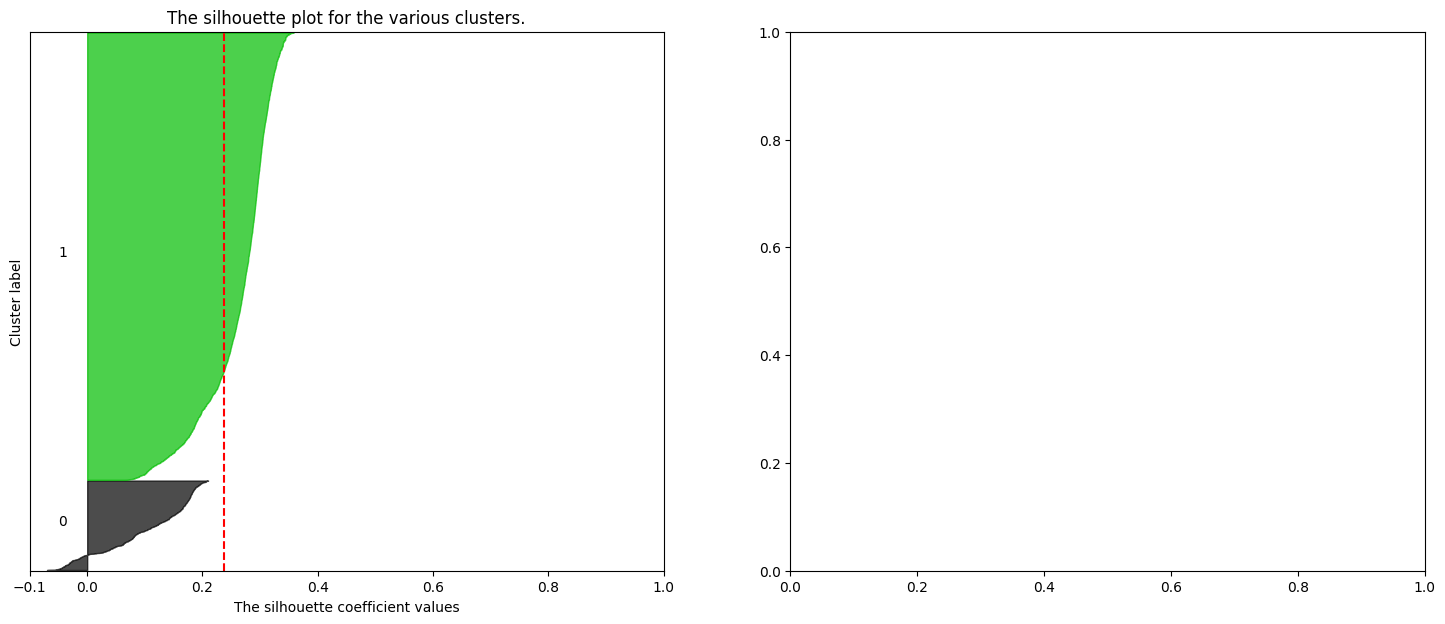

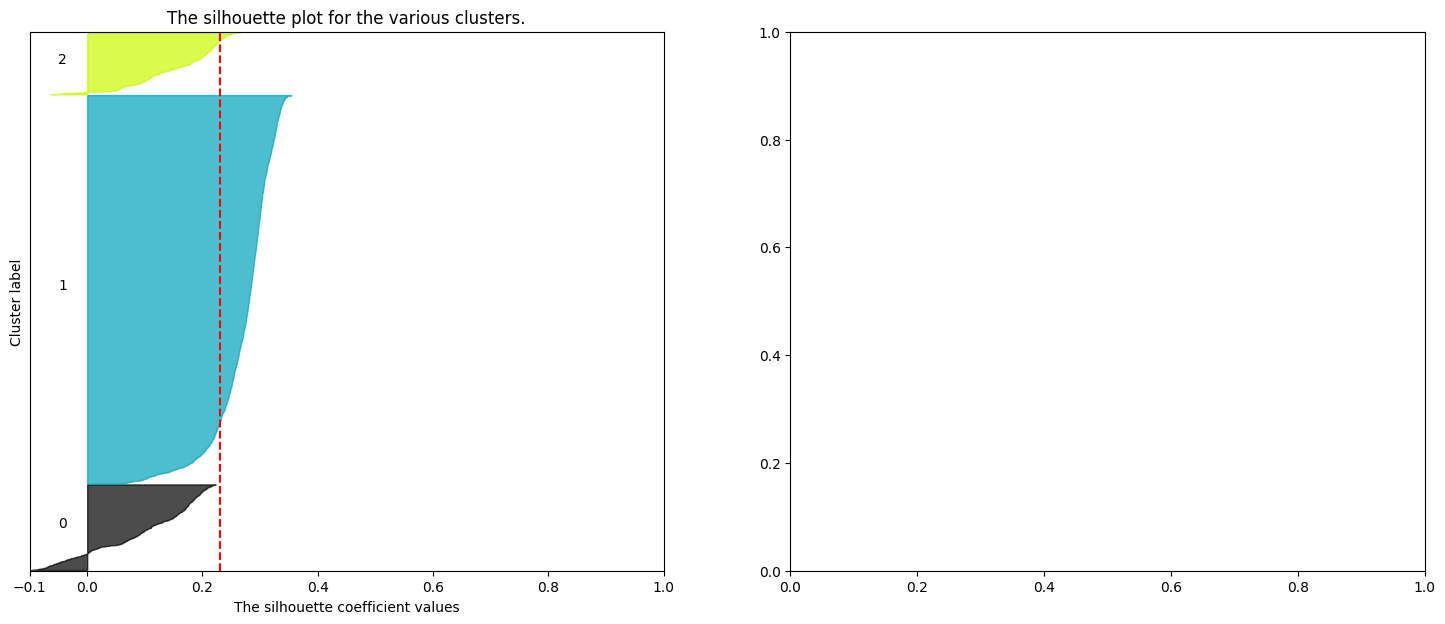

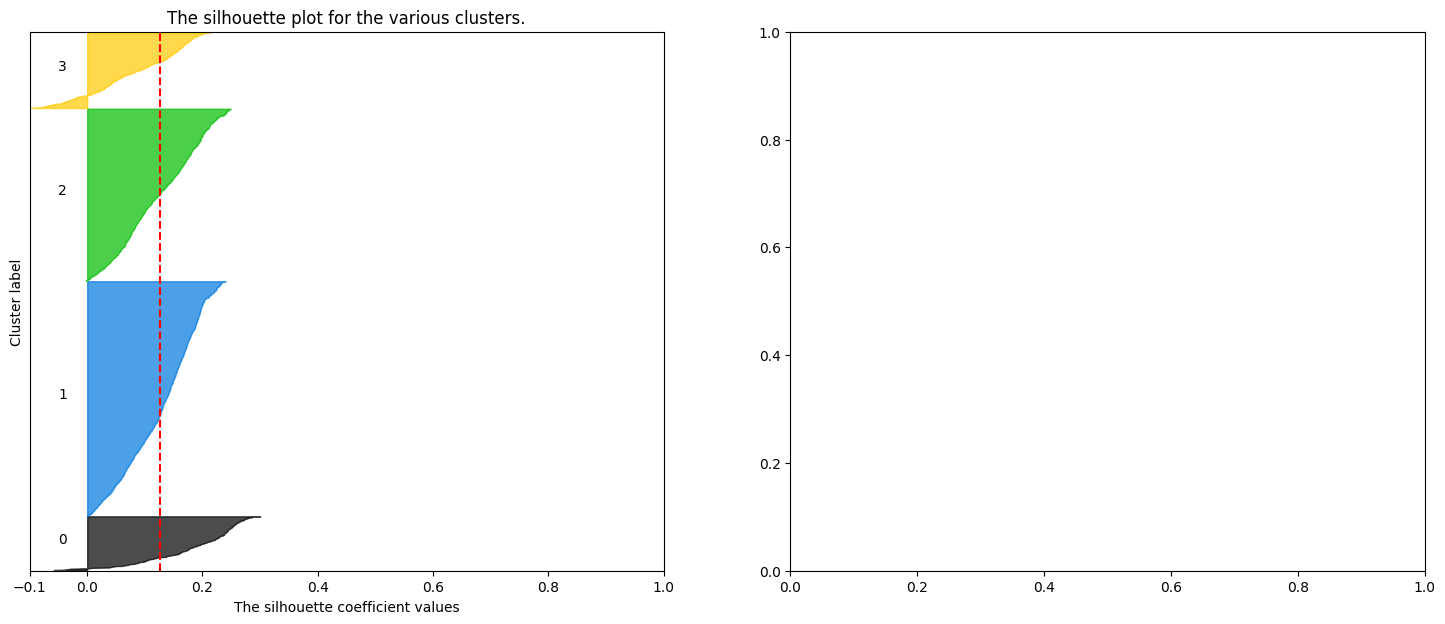

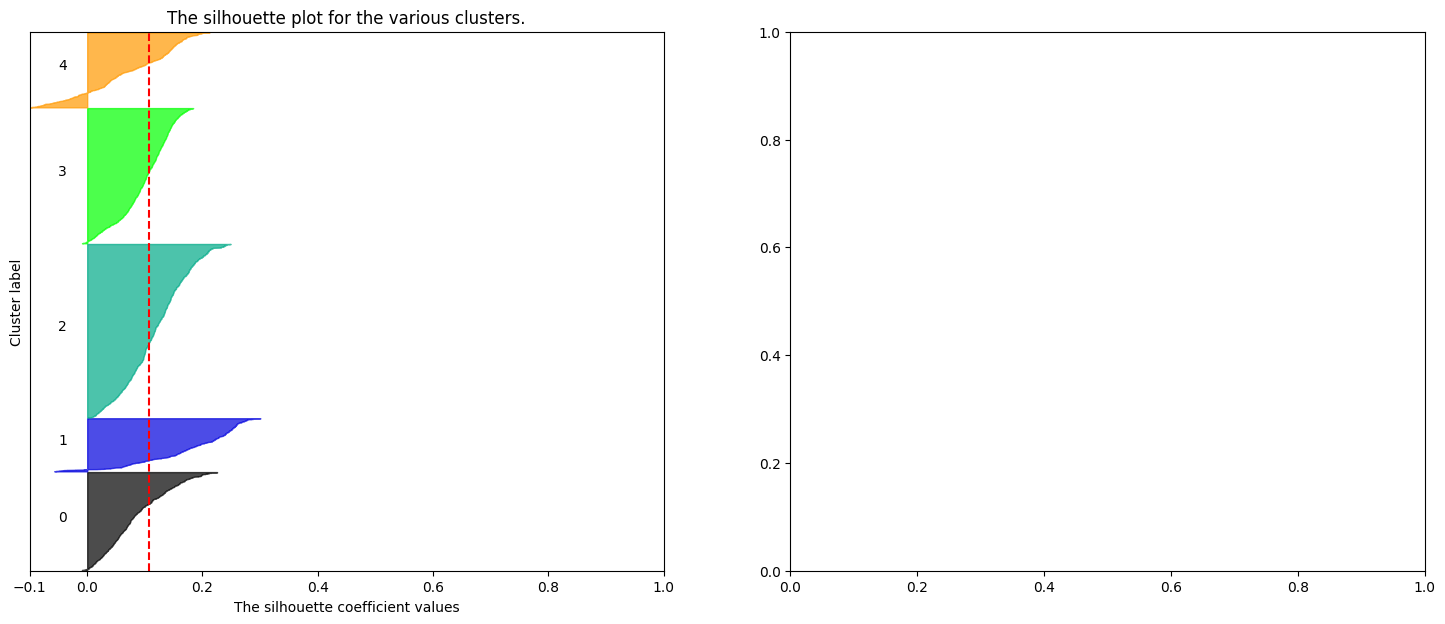

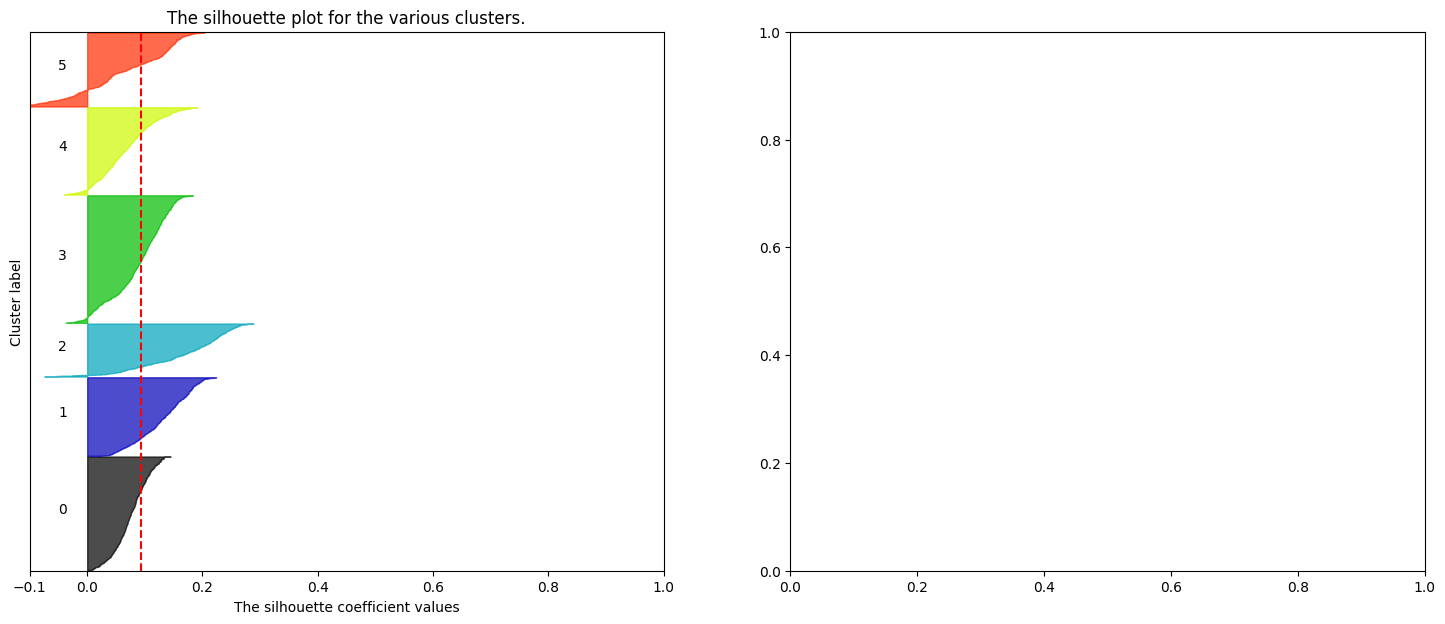

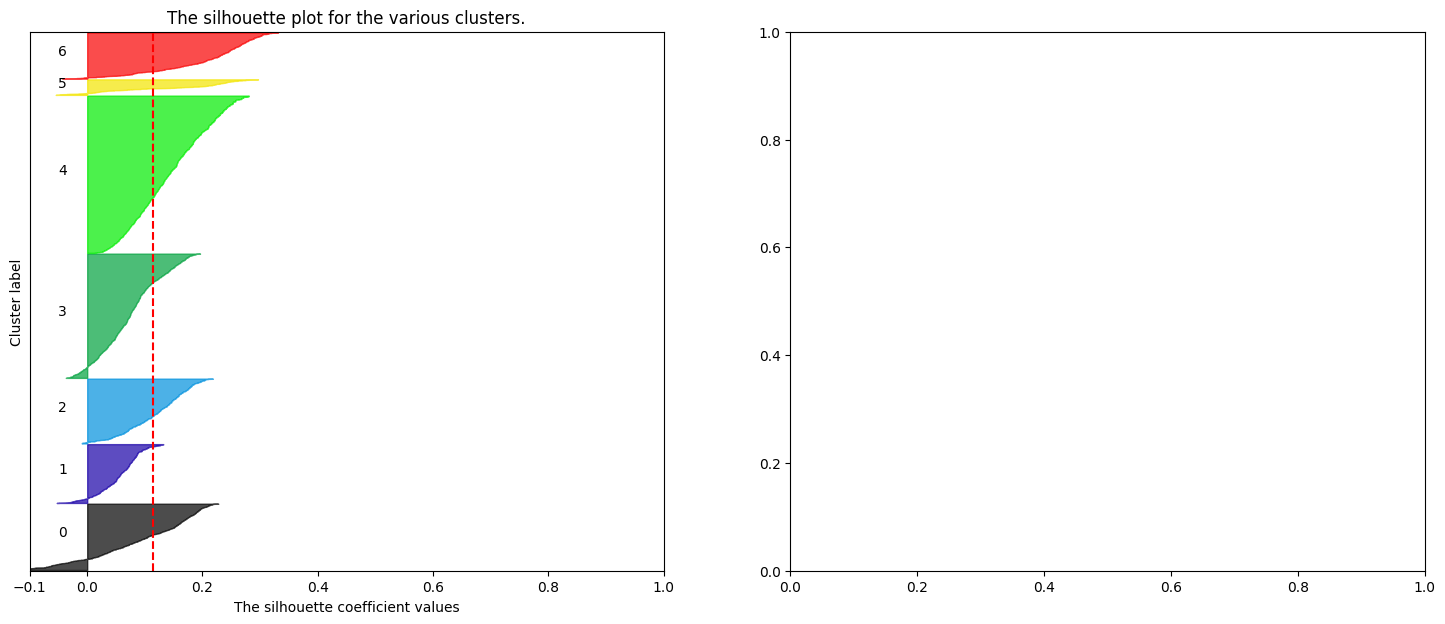

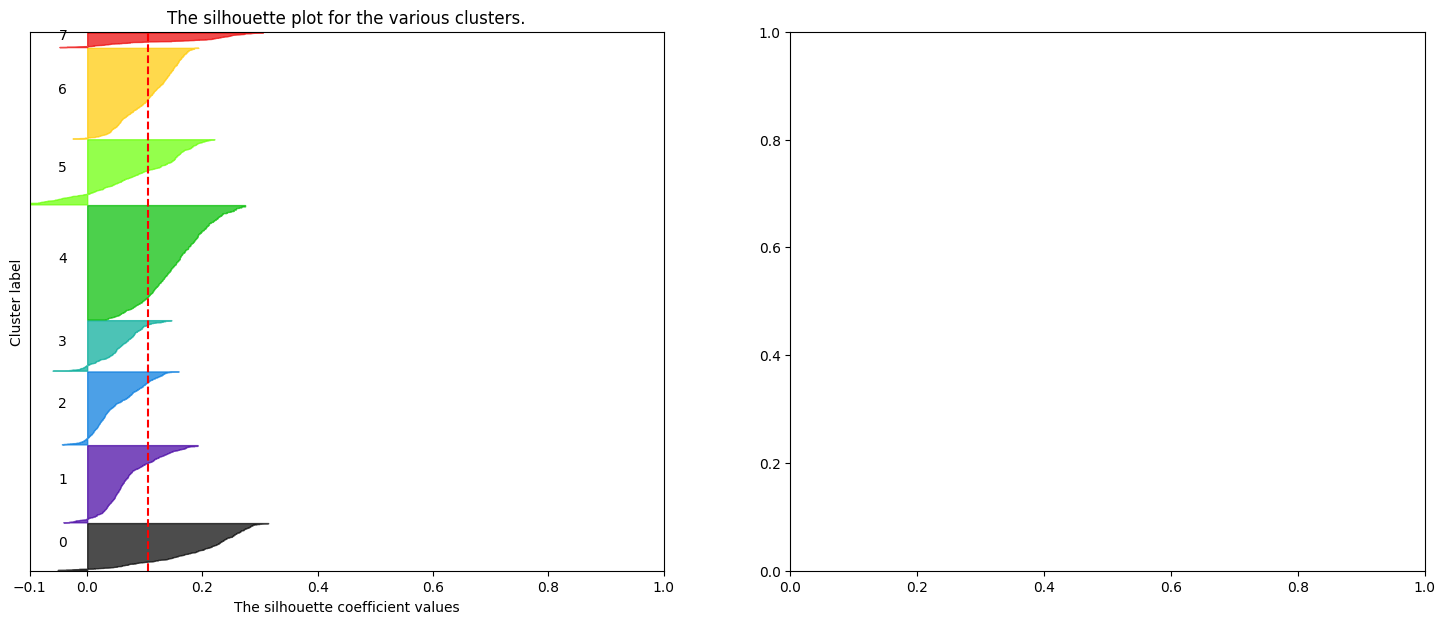

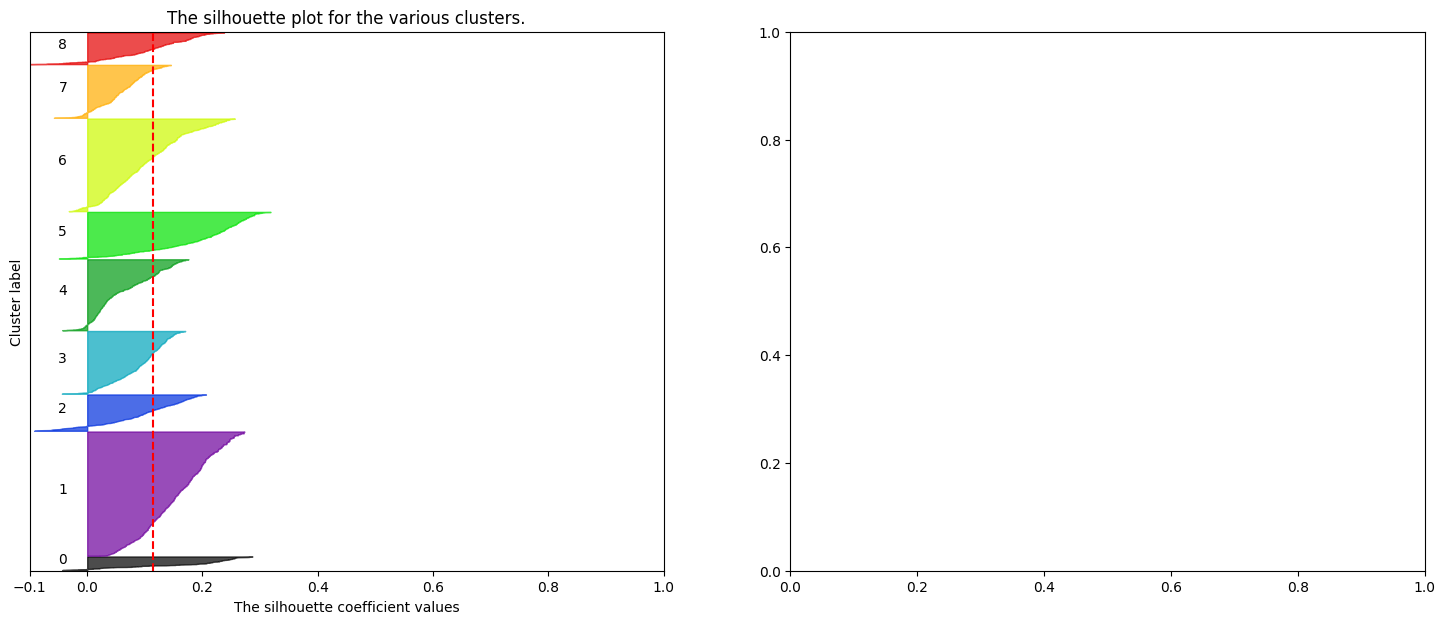

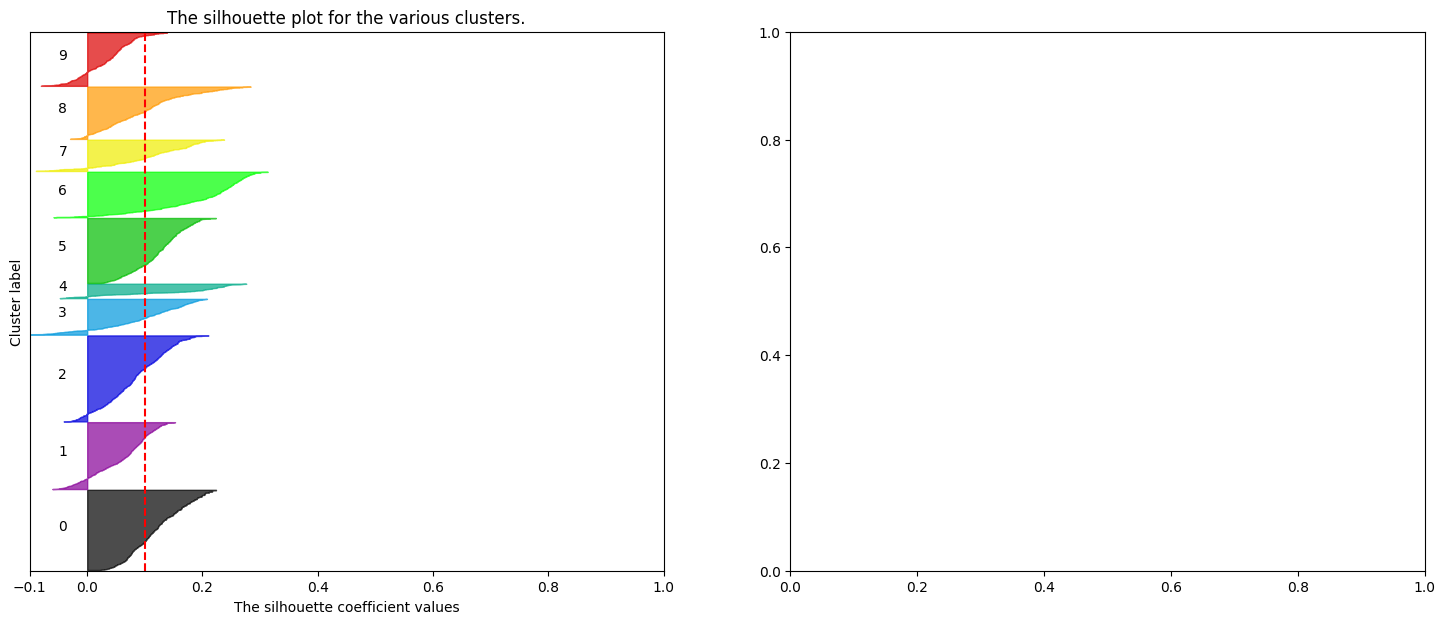

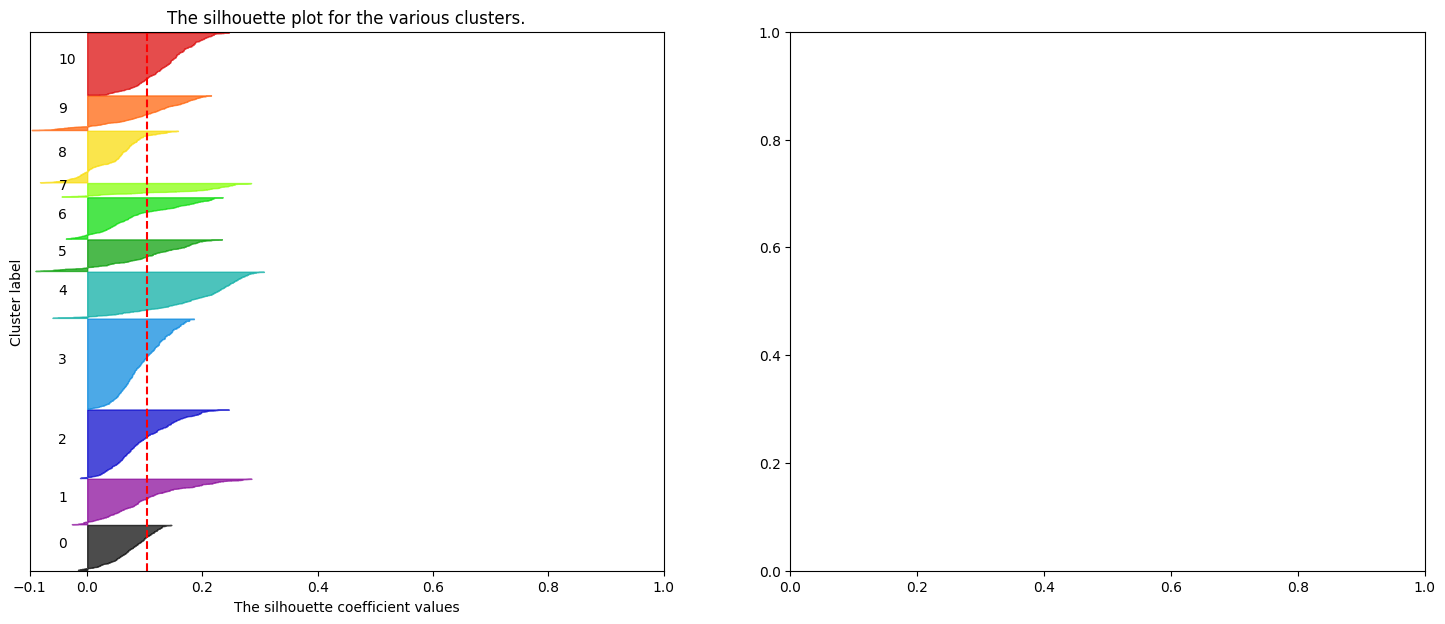

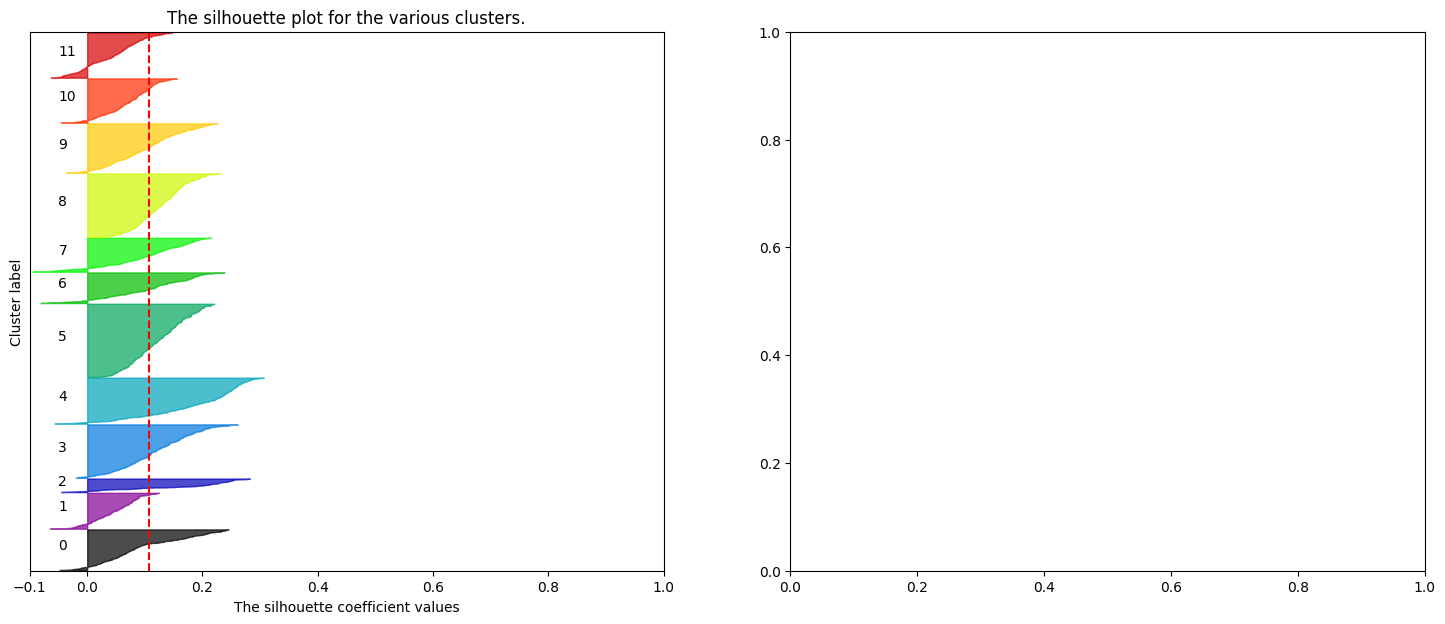

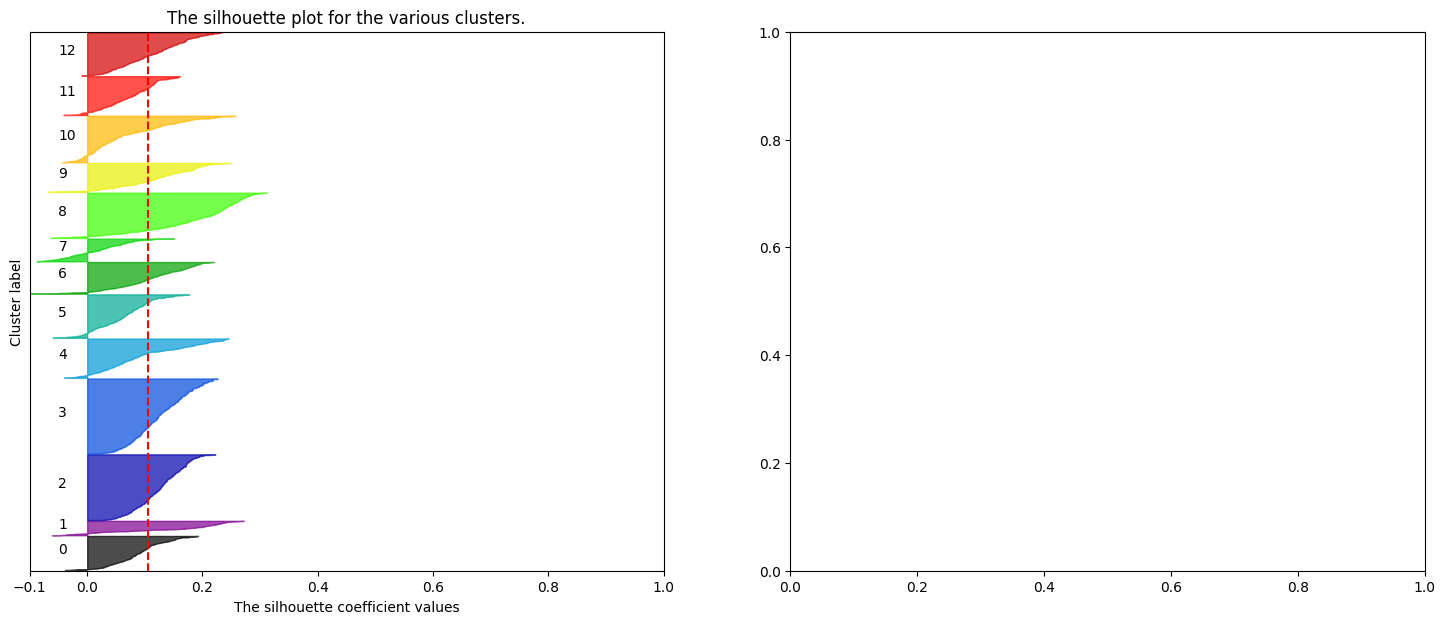

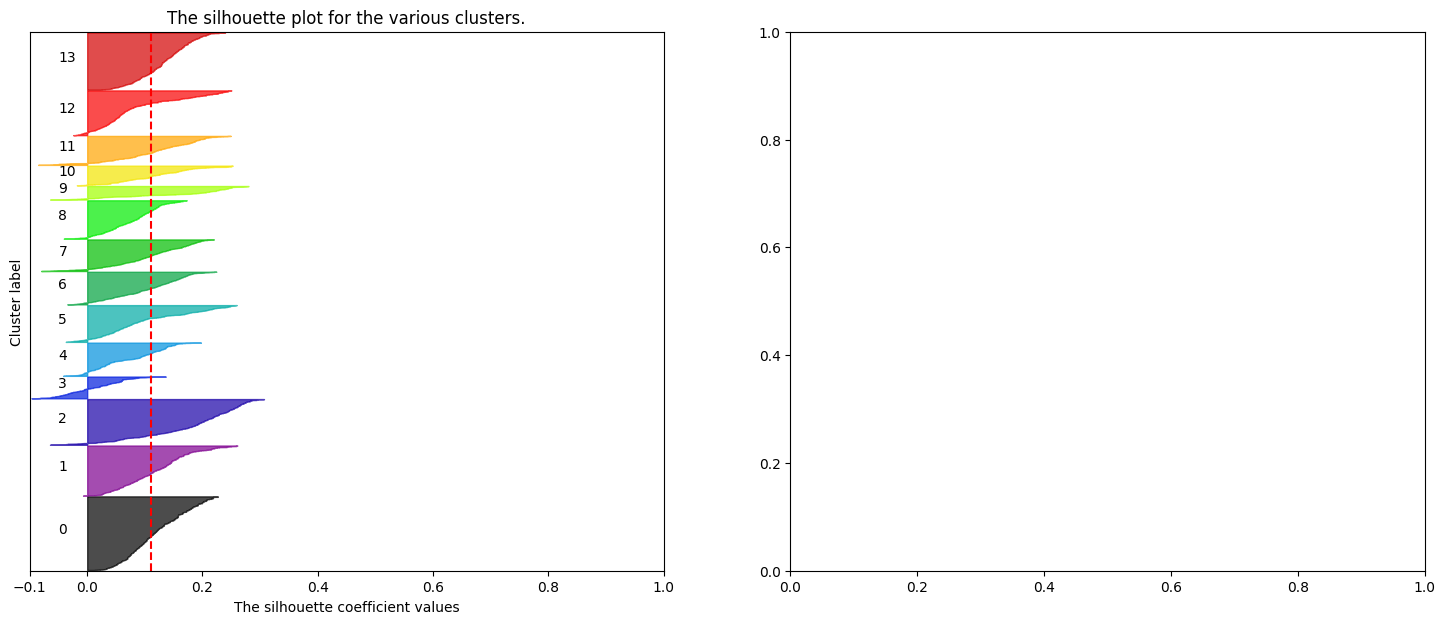

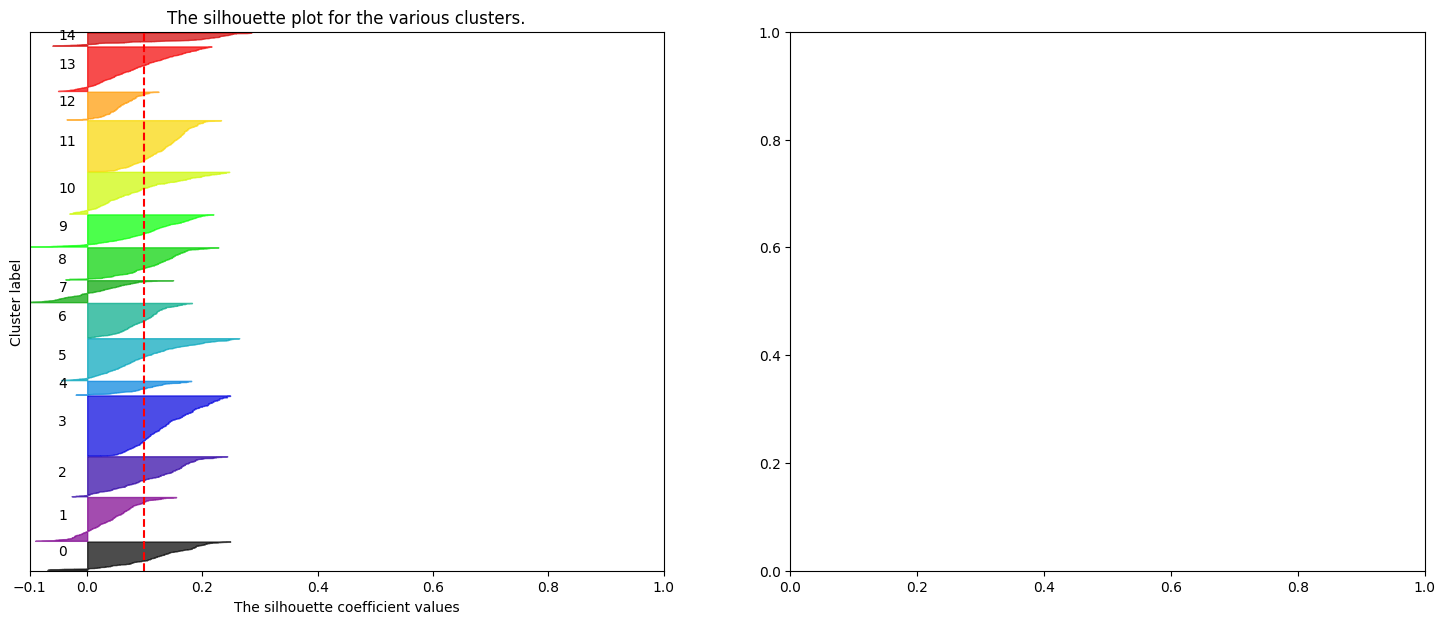

In [59]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
X = phishing_X_train
range_n_clusters = np.arange(2, 16).tolist()
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6015040615178096
For n_clusters = 3 The average silhouette_score is : 0.520386259105638
For n_clusters = 4 The average silhouette_score is : 0.4878831173520672
For n_clusters = 5 The average silhouette_score is : 0.4509336103913792
For n_clusters = 6 The average silhouette_score is : 0.44845021405367946
For n_clusters = 7 The average silhouette_score is : 0.3949003196693185
For n_clusters = 8 The average silhouette_score is : 0.39127244852133275
For n_clusters = 9 The average silhouette_score is : 0.3841114180366524
For n_clusters = 10 The average silhouette_score is : 0.3786320185675758
For n_clusters = 11 The average silhouette_score is : 0.34776438736105775
For n_clusters = 12 The average silhouette_score is : 0.35505554010898166
For n_clusters = 13 The average silhouette_score is : 0.3517224555585013
For n_clusters = 14 The average silhouette_score is : 0.35572596183495747
For n_clusters = 15 The average silhouette_score is : 0

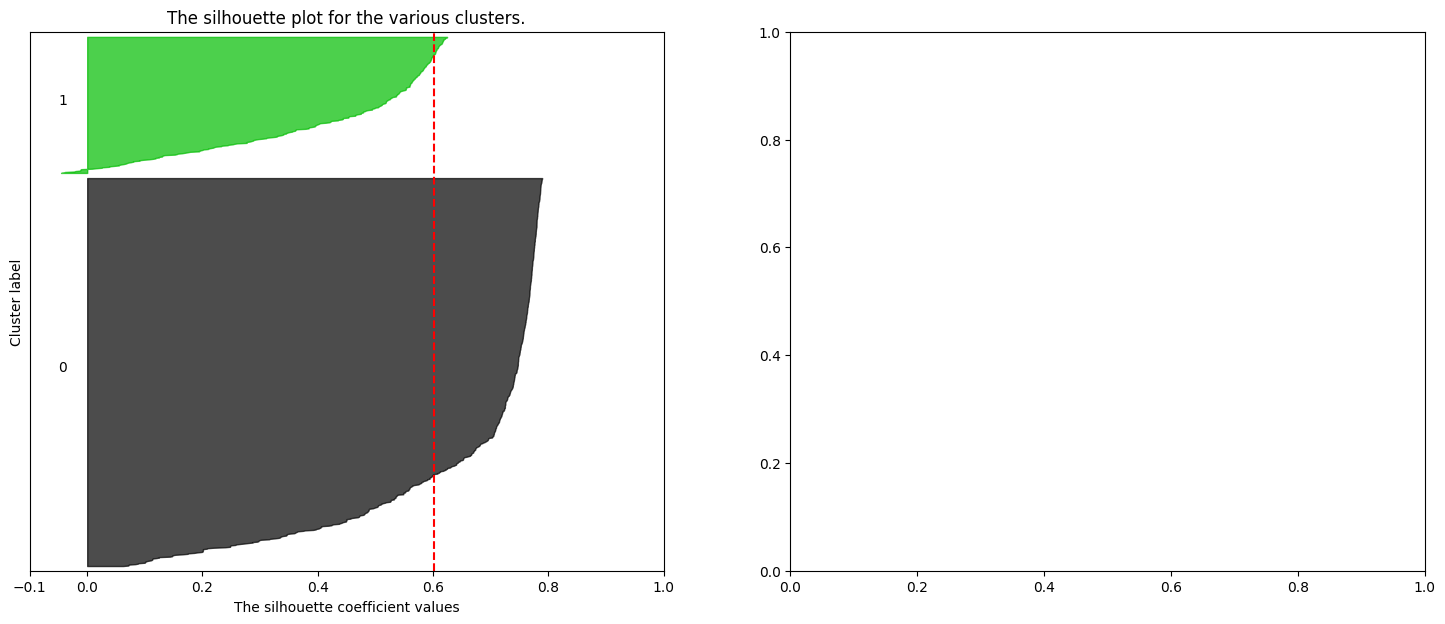

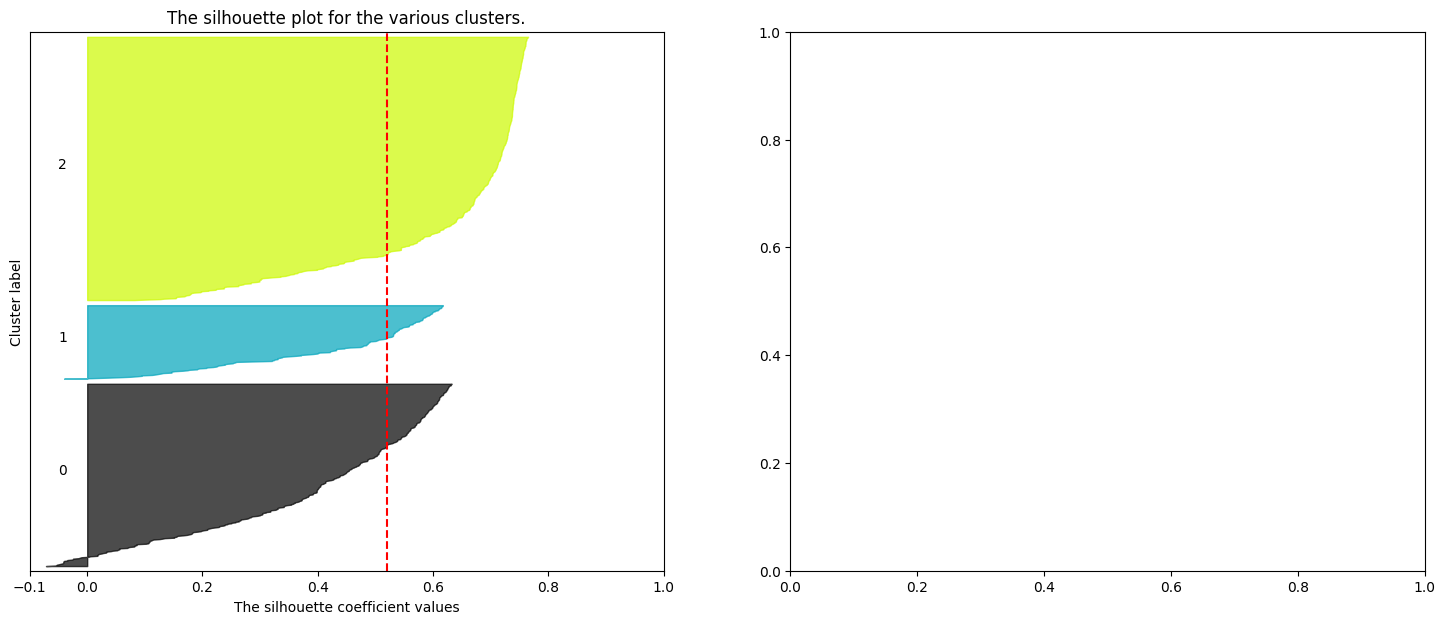

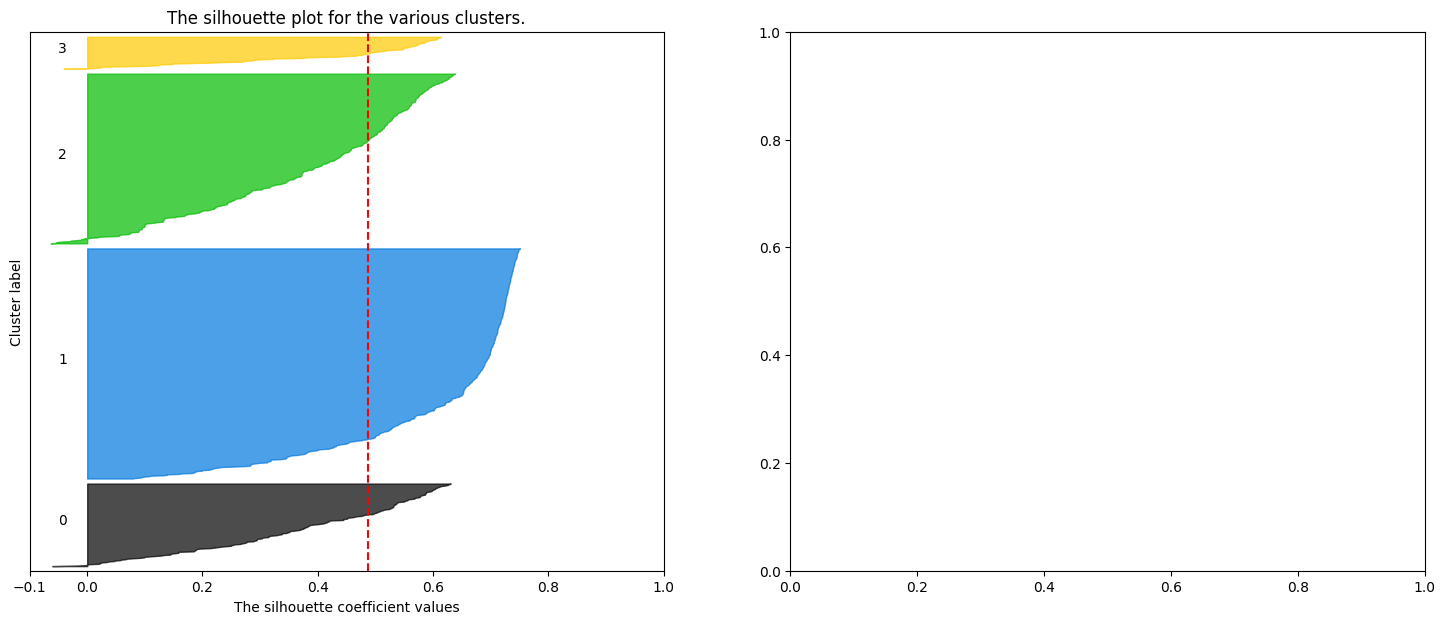

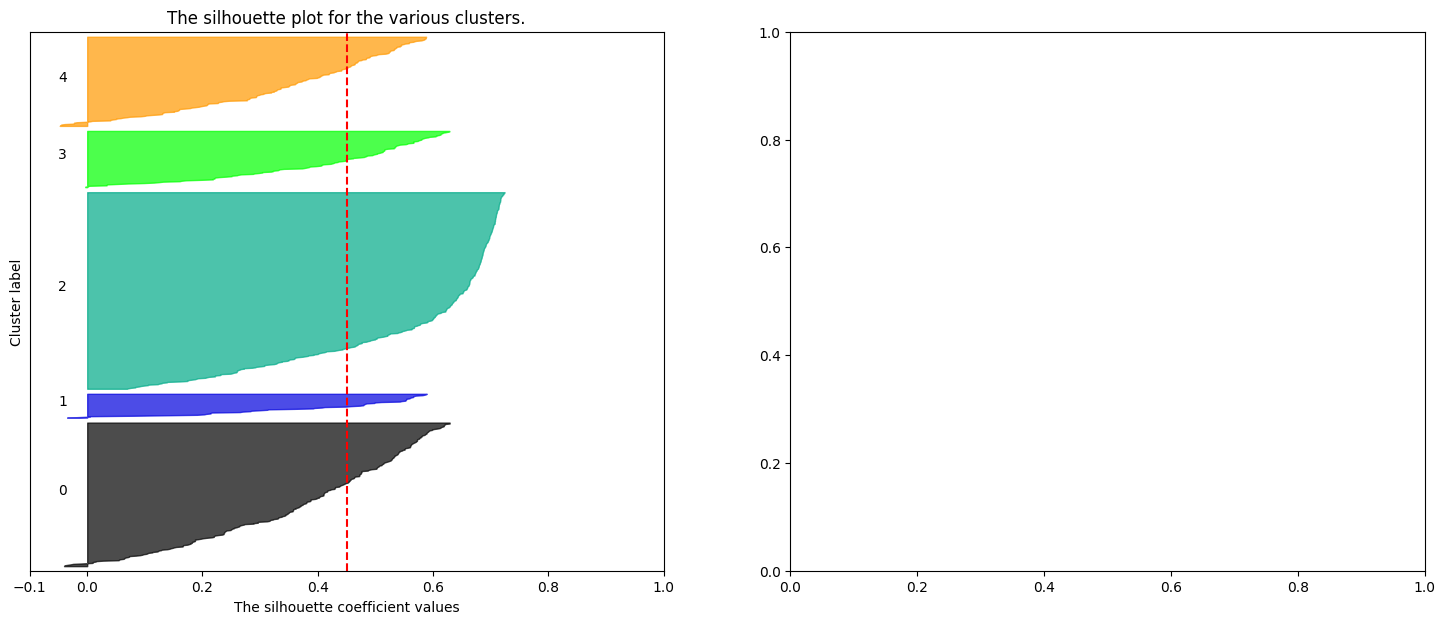

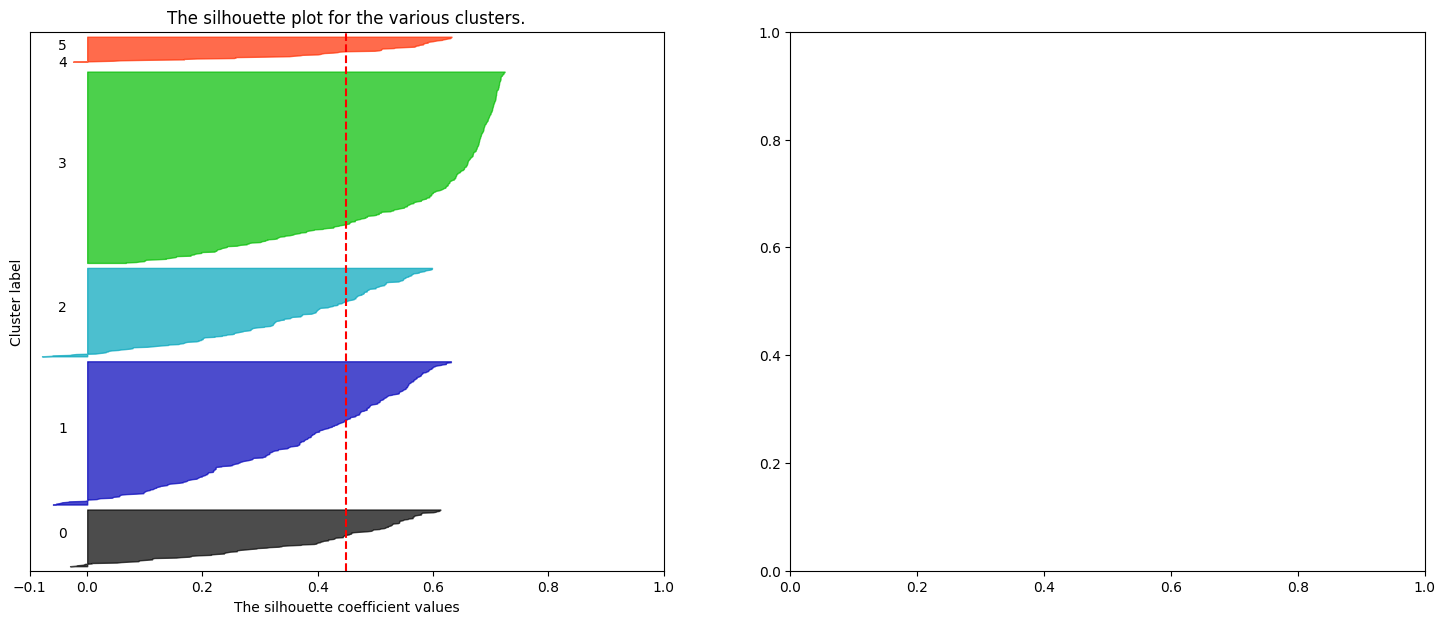

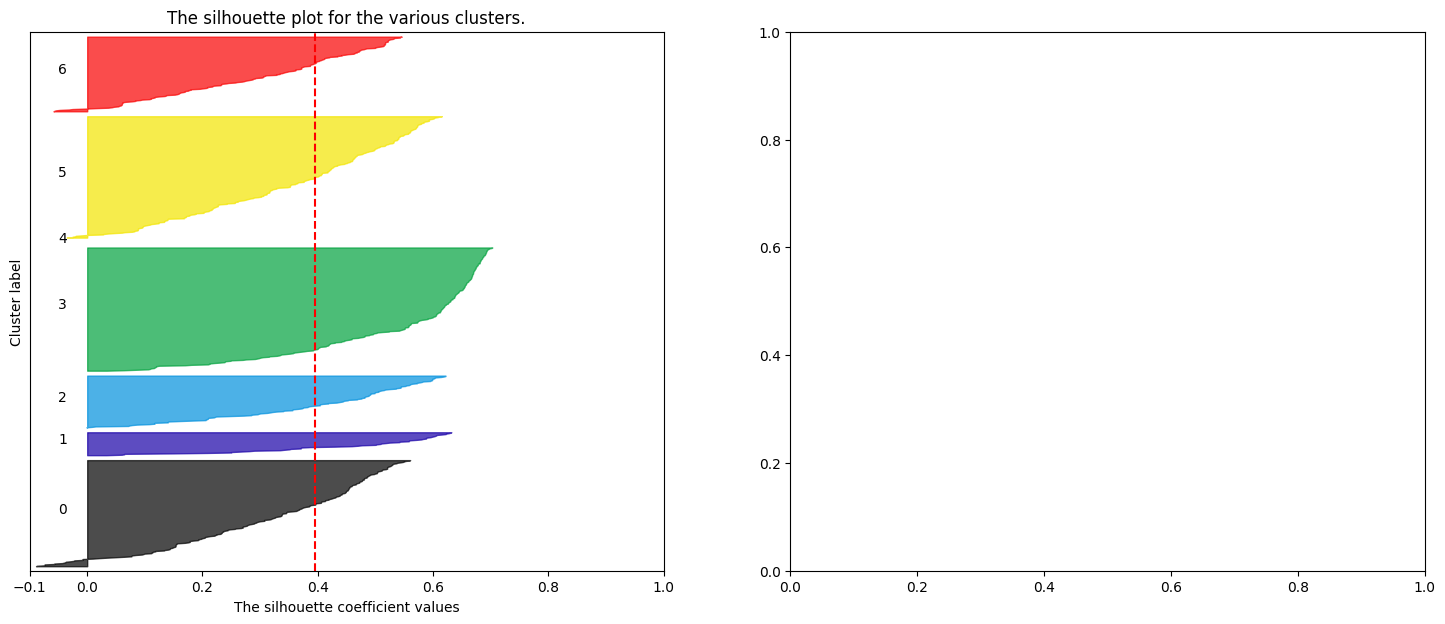

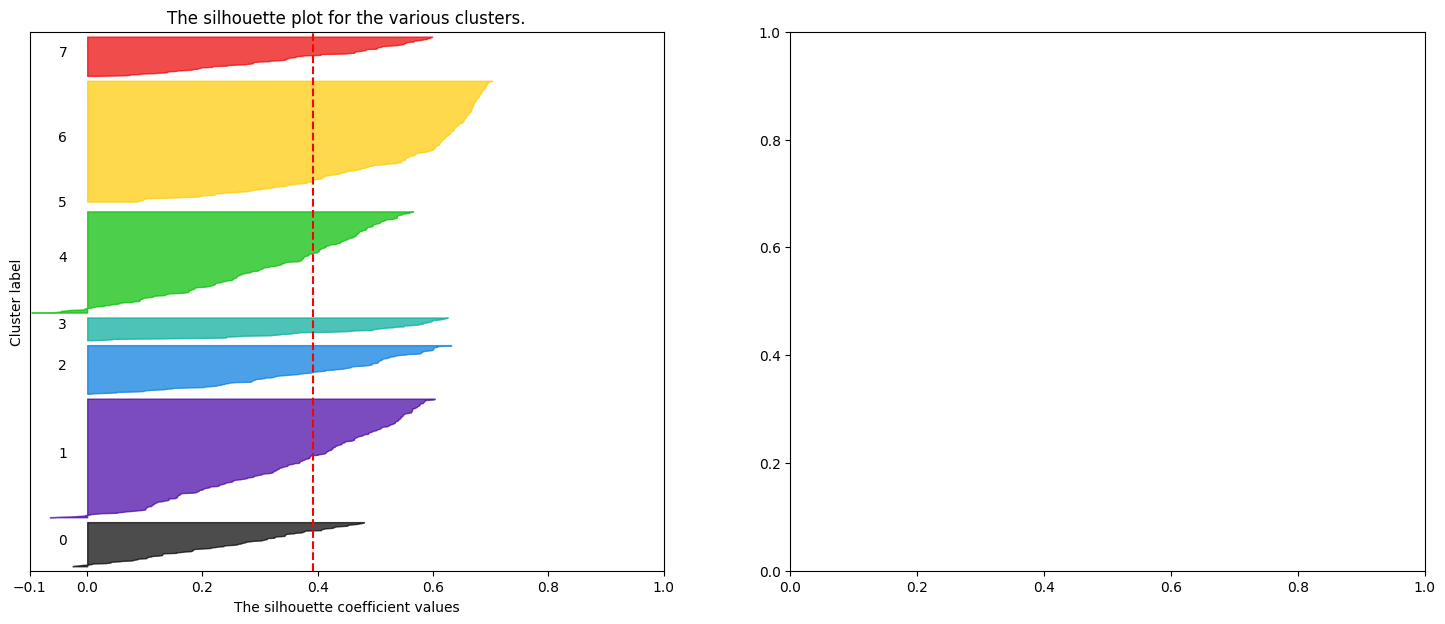

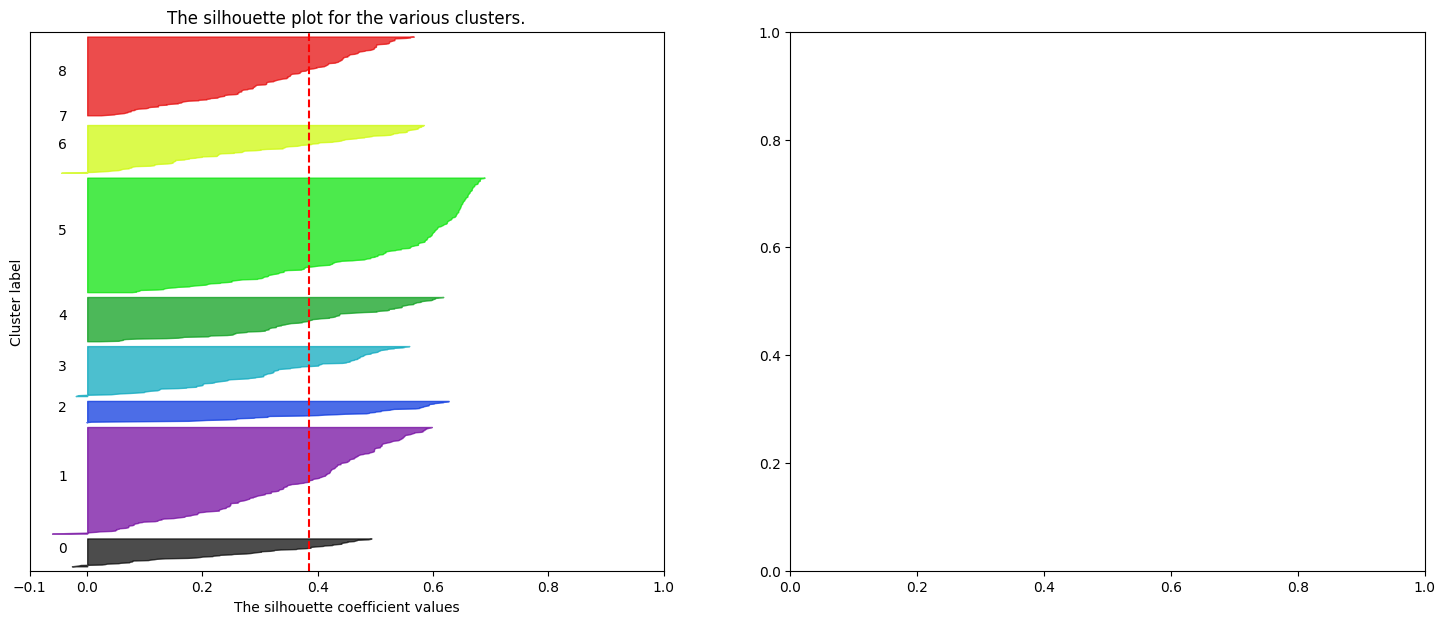

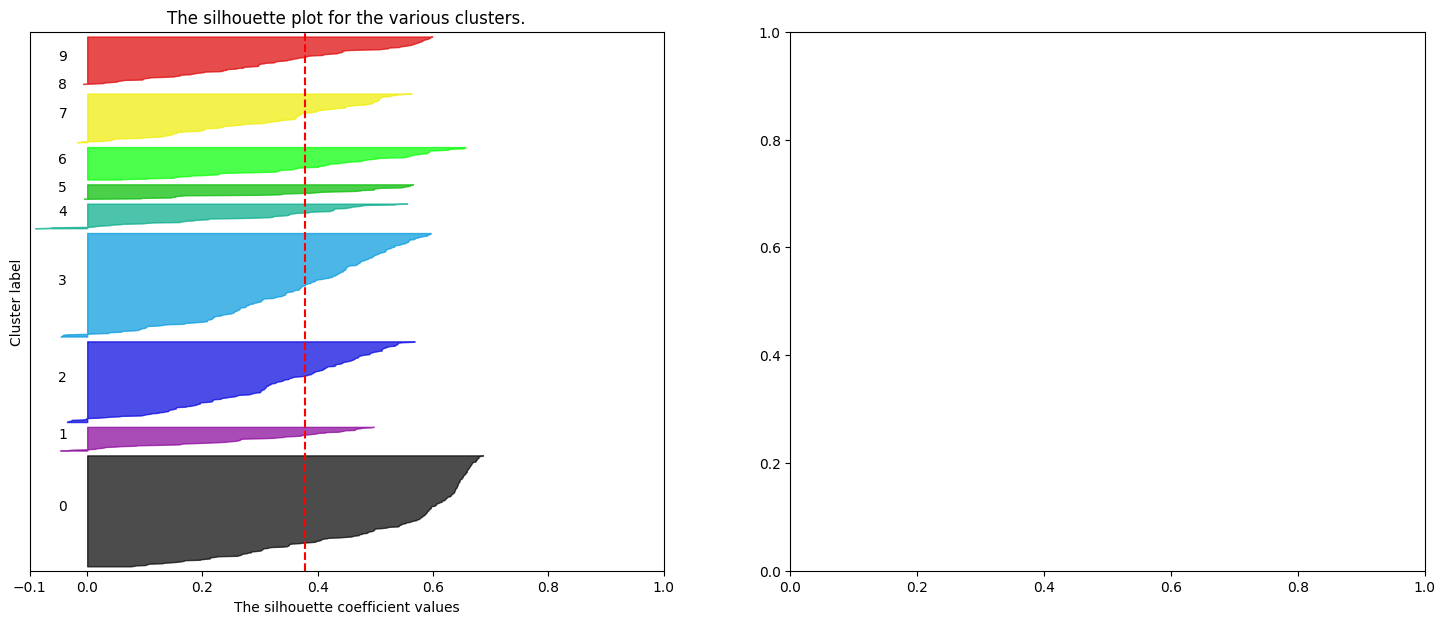

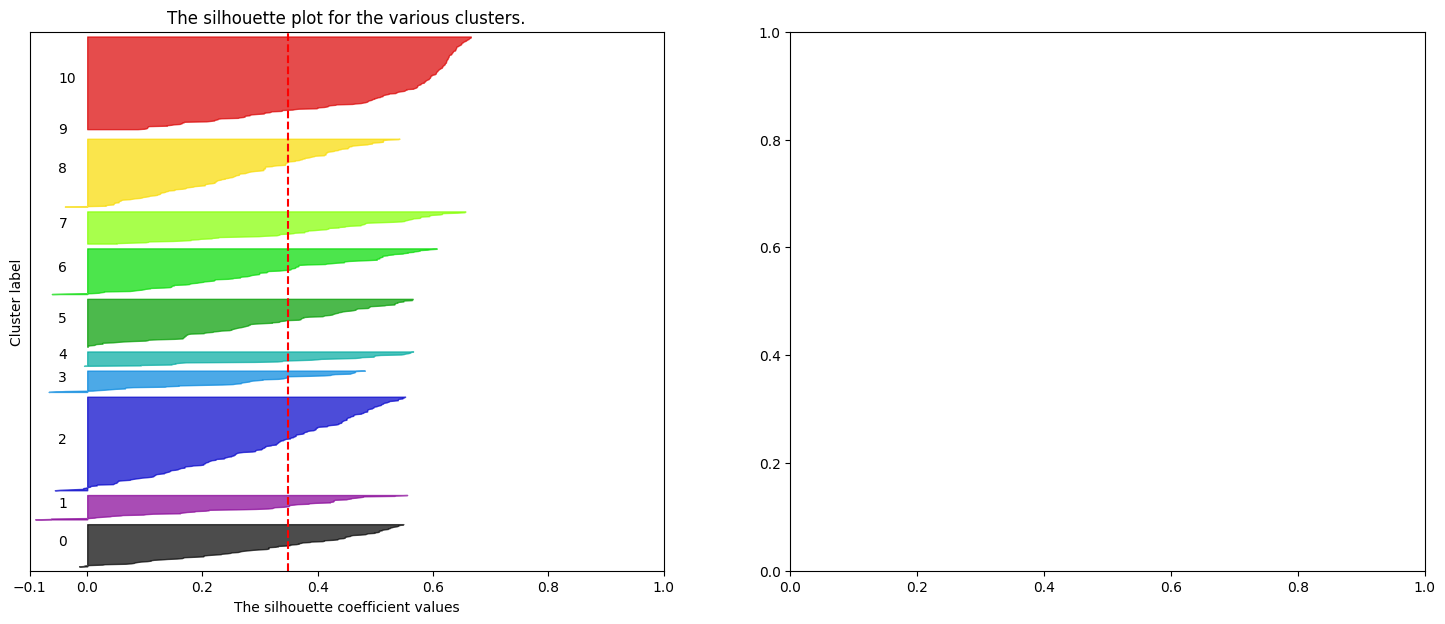

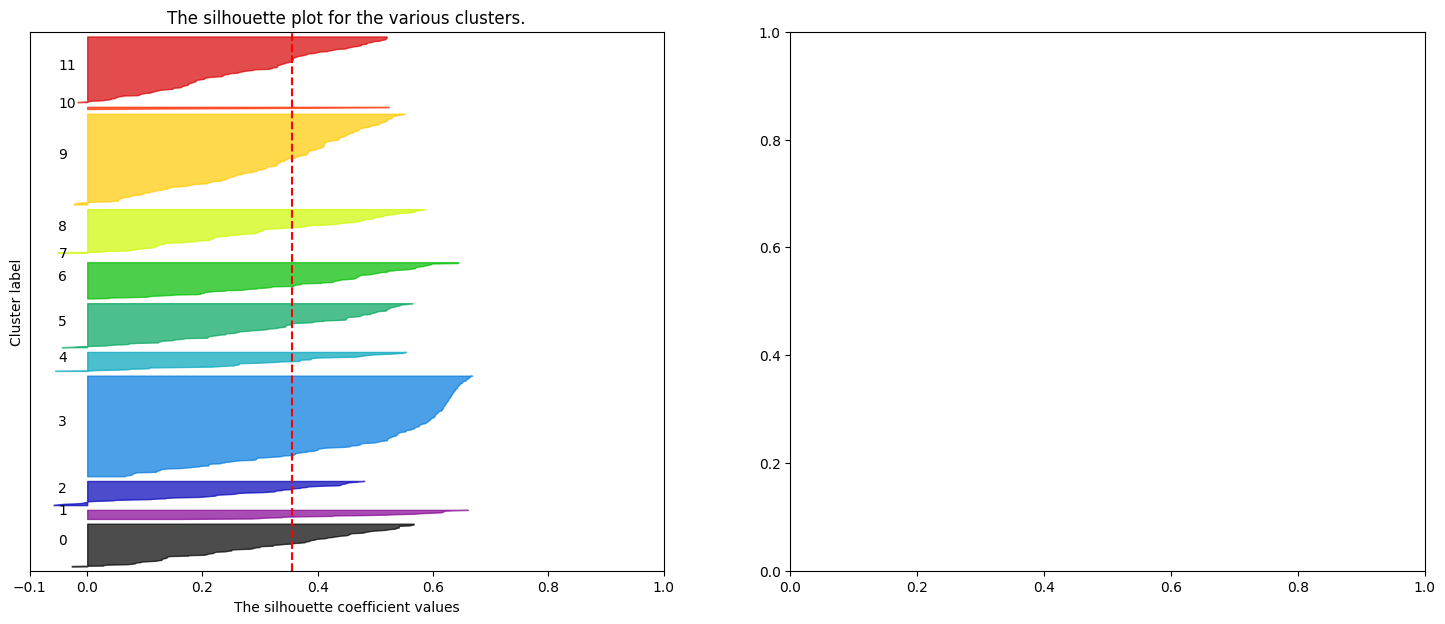

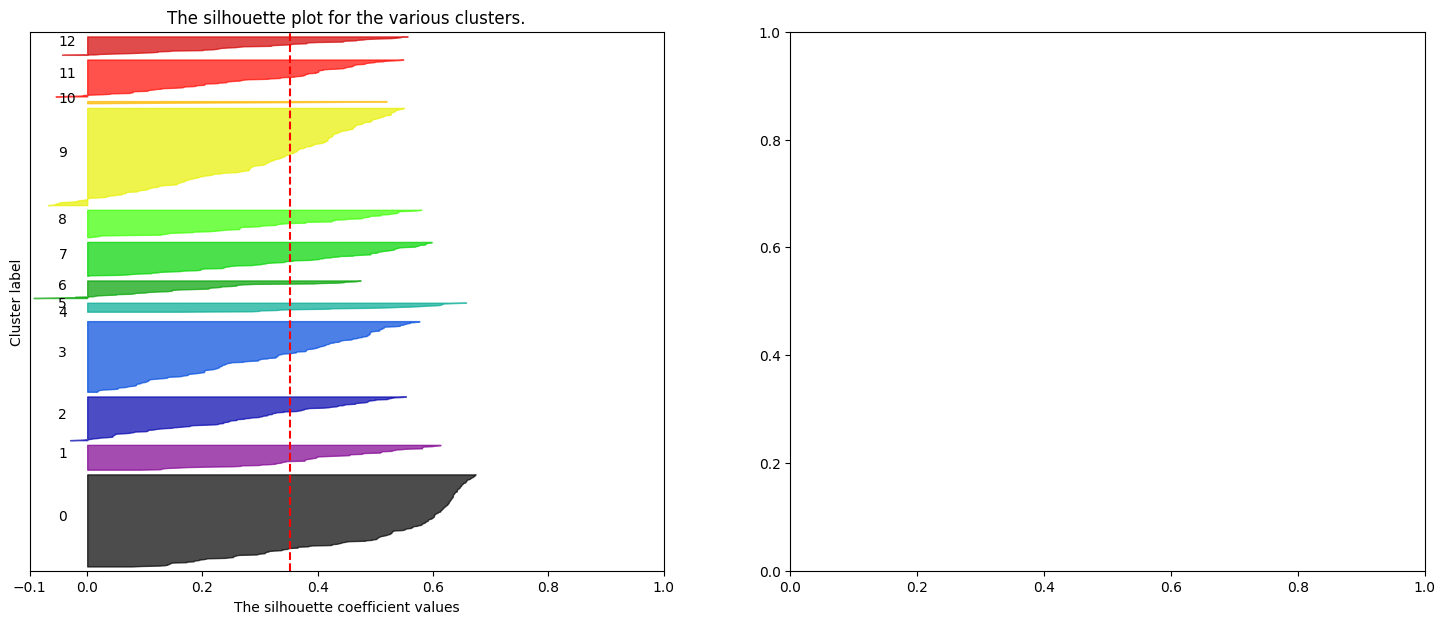

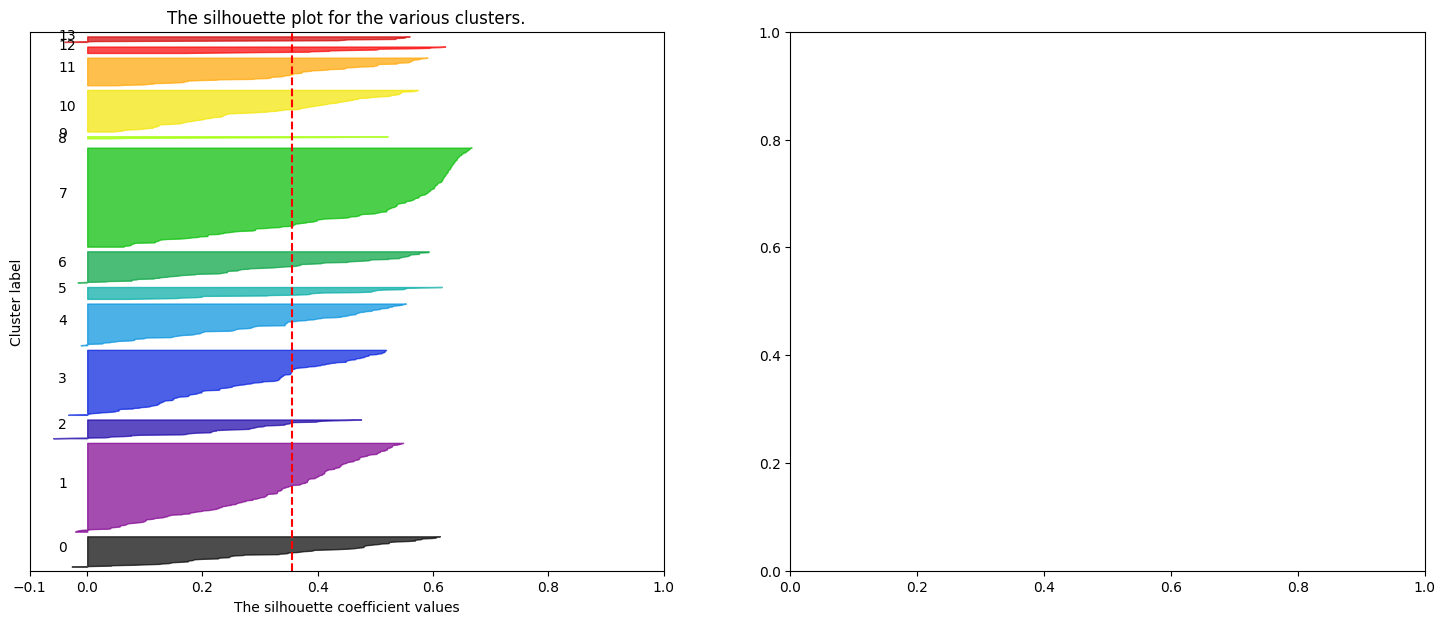

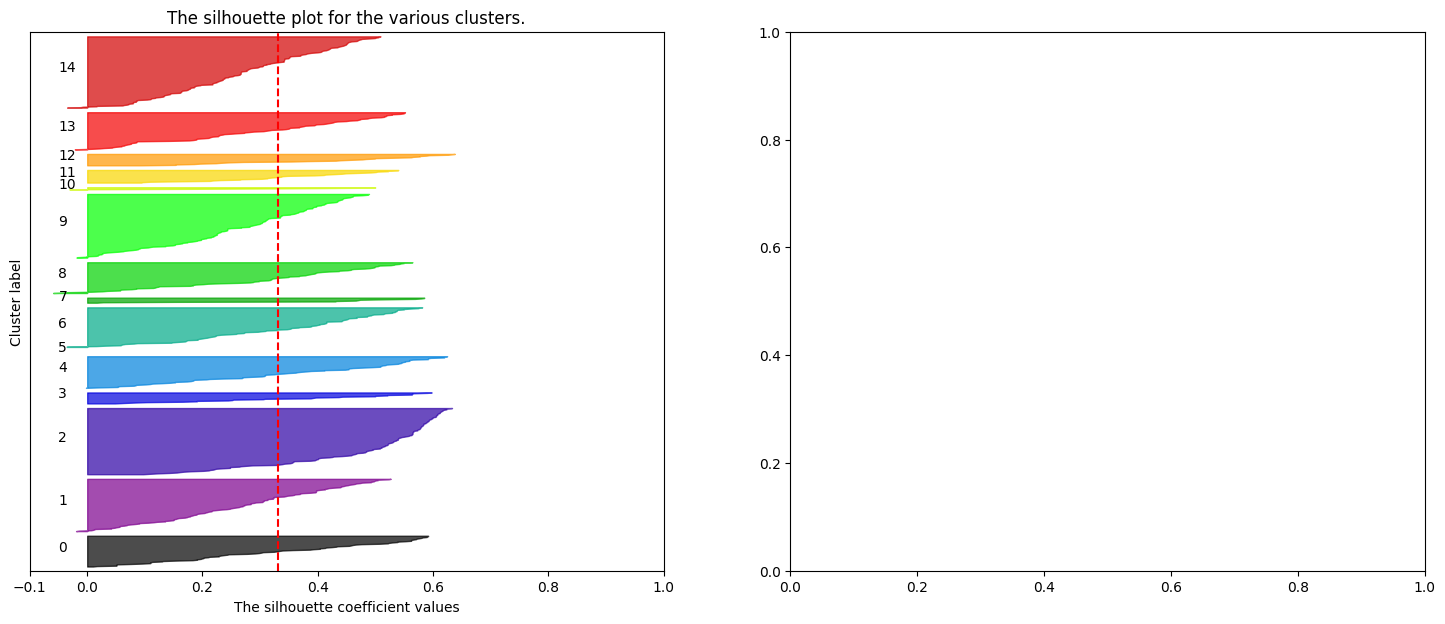

In [58]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
X = wine_X_train
range_n_clusters = np.arange(2, 16).tolist()
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

In [525]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

wine_n_clusters_list = np.arange(2, 16).tolist()
phishing_n_clusters_list = np.arange(2, 16).tolist()

wine_inertia_list_k_means = []
wine_silhouette_list_k_means = []
wine_homogeneity_list_k_means = []
wine_completeness_list_k_means = []
wine_v_measure_list_k_means = []
wine_BIC_list_em = []
wine_AIC_list_em = []
wine_silhouette_list_em = []
wine_homogeneity_list_em = []
wine_completeness_list_em = []
wine_v_measure_list_em = []

phishing_inertia_list_k_means = []
phishing_silhouette_list_k_means = []
phishing_homogeneity_list_k_means = []
phishing_completeness_list_k_means = []
phishing_v_measure_list_k_means = []
phishing_BIC_list_em = []
phishing_AIC_list_em = []
phishing_silhouette_list_em = []
phishing_homogeneity_list_em = []
phishing_completeness_list_em = []
phishing_v_measure_list_em = []

for n_clusters in wine_n_clusters_list:
    # Wine
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    means = kmeans.fit(wine_X_train)
    inertia = kmeans.inertia_
    predicted_labels = kmeans.predict(wine_X_train)
    silhouette = silhouette_score(wine_X_train, predicted_labels, metric="euclidean", random_state=random_state)
    homogeneity_score, completeness_score, v_measure_score = homogeneity_completeness_v_measure(wine_Y_train, predicted_labels)
    wine_inertia_list_k_means.append(inertia)
    wine_silhouette_list_k_means.append(silhouette)
    wine_homogeneity_list_k_means.append(homogeneity_score)
    wine_completeness_list_k_means.append(completeness_score)
    wine_v_measure_list_k_means.append(v_measure_score)
    
    em = GaussianMixture(n_components=n_clusters, covariance_type="full", random_state=random_state)
    em.fit(wine_X_train)
    BIC = em.bic(wine_X_train)
    AIC = em.aic(wine_X_train)
    predicted_labels = em.predict(wine_X_train)
    silhouette = silhouette_score(wine_X_train, predicted_labels, metric="euclidean", random_state=random_state)
    homogeneity_score, completeness_score, v_measure_score = homogeneity_completeness_v_measure(wine_Y_train, predicted_labels)
    wine_BIC_list_em.append(BIC)
    wine_AIC_list_em.append(AIC)
    wine_silhouette_list_em.append(silhouette)
    wine_homogeneity_list_em.append(homogeneity_score)
    wine_completeness_list_em.append(completeness_score)
    wine_v_measure_list_em.append(v_measure_score)
    
for n_clusters in phishing_n_clusters_list:
    # Phishing
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    means = kmeans.fit(phishing_X_train)
    inertia = kmeans.inertia_
    predicted_labels = kmeans.predict(phishing_X_train)
    silhouette = silhouette_score(phishing_X_train, predicted_labels, metric="euclidean", random_state=random_state)
    homogeneity_score, completeness_score, v_measure_score = homogeneity_completeness_v_measure(phishing_Y_train, predicted_labels)
    phishing_inertia_list_k_means.append(inertia)
    phishing_silhouette_list_k_means.append(silhouette)
    phishing_homogeneity_list_k_means.append(homogeneity_score)
    phishing_completeness_list_k_means.append(completeness_score)
    phishing_v_measure_list_k_means.append(v_measure_score)
    
    em = GaussianMixture(n_components=n_clusters, covariance_type="full", random_state=random_state)
    em.fit(phishing_X_train)
    BIC = em.bic(phishing_X_train)
    AIC = em.aic(phishing_X_train)
    predicted_labels = em.predict(phishing_X_train)
    silhouette = silhouette_score(phishing_X_train, predicted_labels, metric="euclidean", random_state=random_state)
    homogeneity_score, completeness_score, v_measure_score = homogeneity_completeness_v_measure(phishing_Y_train, predicted_labels)
    phishing_BIC_list_em.append(BIC)
    phishing_AIC_list_em.append(AIC)
    phishing_silhouette_list_em.append(silhouette)
    phishing_homogeneity_list_em.append(homogeneity_score)
    phishing_completeness_list_em.append(completeness_score)
    phishing_v_measure_list_em.append(v_measure_score)

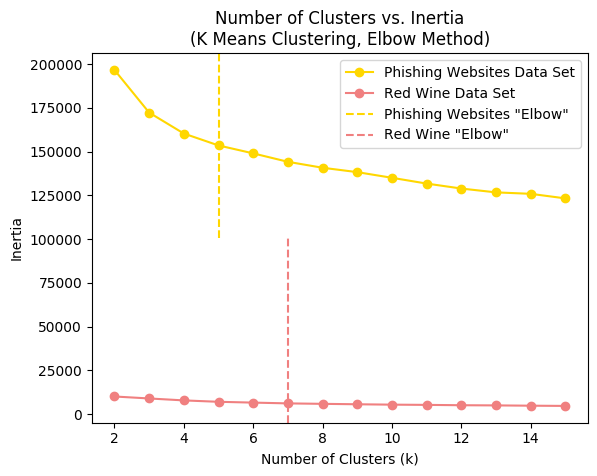

In [526]:
plt.title("Number of Clusters vs. Inertia\n(K Means Clustering, Elbow Method)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.plot(phishing_n_clusters_list, phishing_inertia_list_k_means, color="gold", marker='o', label="Phishing Websites Data Set")
plt.plot(wine_n_clusters_list, wine_inertia_list_k_means, color="lightcoral", marker='o', label="Red Wine Data Set")
# plt.show()
# plt.close()

from kneed import KneeLocator, DataGenerator as dg
knees1 = []
knees2 = []
kl = KneeLocator(phishing_n_clusters_list, phishing_inertia_list_k_means, curve="convex", direction="decreasing")
k2 = KneeLocator(wine_n_clusters_list, wine_inertia_list_k_means, curve="convex", direction="decreasing")
knees1.append(kl.knee)
knees2.append(k2.knee)
plt.axvline(knees1[0], color='gold', linestyle="--", label='Phishing Websites "Elbow"', ymin=0.5)
plt.axvline(knees2[0], color='lightcoral', linestyle="--", label='Red Wine "Elbow"', ymax=0.5)
plt.legend(loc='best')
plt.show()

/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == "":


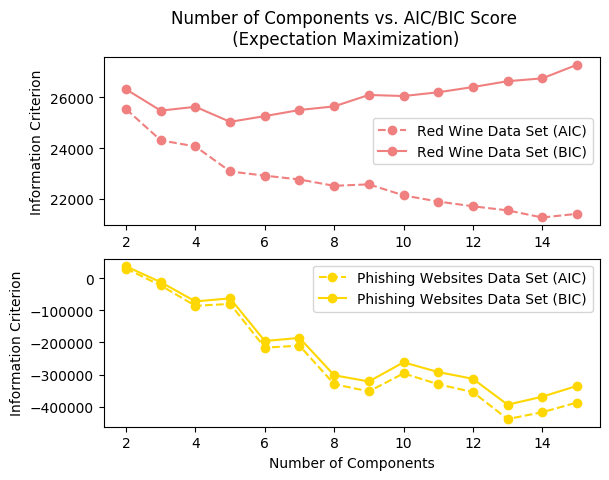

In [528]:
fig, axs = plt.subplots(2)
fig.suptitle("Number of Components vs. AIC/BIC Score\n (Expectation Maximization)")
axs[0].plot(wine_n_clusters_list, wine_AIC_list_em, color="lightcoral", marker='o', linestyle="--", label="Red Wine Data Set (AIC)")
axs[0].plot(wine_n_clusters_list, wine_BIC_list_em, color="lightcoral", marker='o', label="Red Wine Data Set (BIC)")
axs[1].plot(phishing_n_clusters_list, phishing_AIC_list_em, color="gold", marker='o', linestyle="--", label="Phishing Websites Data Set (AIC)")
axs[1].plot(phishing_n_clusters_list, phishing_BIC_list_em, color="gold", marker='o', label="Phishing Websites Data Set (BIC)")

axs[0].set(ylabel='Information Criterion')
axs[0].legend(loc="best")
axs[1].set(xlabel='Number of Components', ylabel='Information Criterion')
axs[1].legend(loc="best")
fig.show()

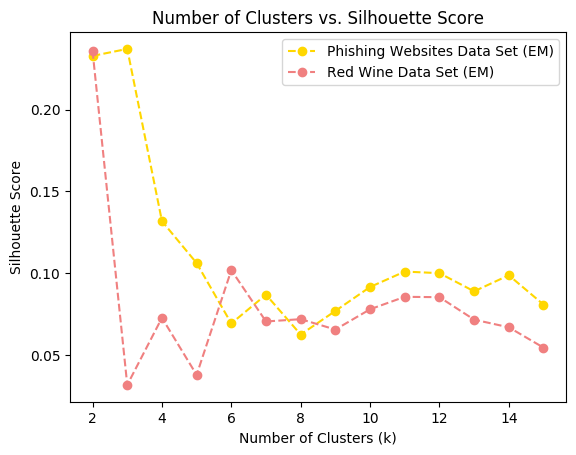

In [529]:
plt.title("Number of Clusters vs. Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
# plt.plot(phishing_n_clusters_list, phishing_silhouette_list_k_means, color="gold", marker='o', label="Phishing Websites Data Set (K Means)")
# plt.plot(wine_n_clusters_list, wine_silhouette_list_k_means, color="lightcoral", marker='o', label="Red Wine Data Set (K Means)")
plt.plot(phishing_n_clusters_list, phishing_silhouette_list_em, color="gold", marker='o', linestyle="--", label="Phishing Websites Data Set (EM)")
plt.plot(wine_n_clusters_list, wine_silhouette_list_em, color="lightcoral", marker='o', linestyle="--", label="Red Wine Data Set (EM)")
plt.legend(loc='best')
plt.show()

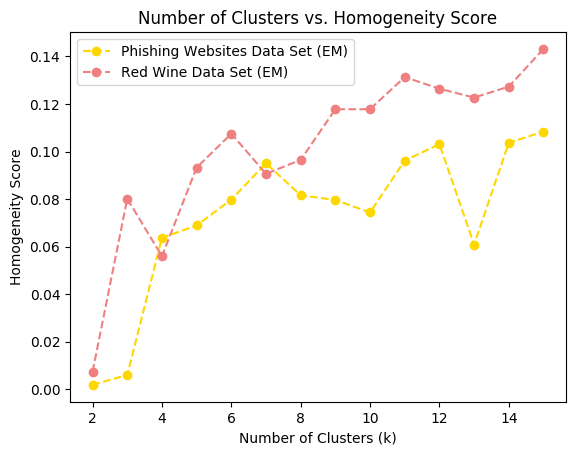

In [531]:
plt.title("Number of Clusters vs. Homogeneity Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Homogeneity Score")
# plt.plot(phishing_n_clusters_list, phishing_homogeneity_list_k_means, color="gold", marker='o', label="Phishing Websites Data Set (K Means)")
# plt.plot(wine_n_clusters_list, wine_homogeneity_list_k_means, color="lightcoral", marker='o', label="Red Wine Data Set (K Means)")
plt.plot(phishing_n_clusters_list, phishing_homogeneity_list_em, color="gold", marker='o', linestyle="--", label="Phishing Websites Data Set (EM)")
plt.plot(wine_n_clusters_list, wine_homogeneity_list_em, color="lightcoral", marker='o', linestyle="--", label="Red Wine Data Set (EM)")
plt.legend(loc='best')
plt.show()

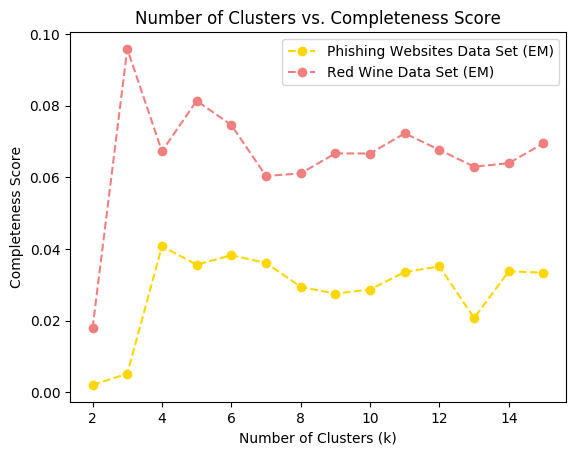

In [532]:
plt.title("Number of Clusters vs. Completeness Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Completeness Score")
# plt.plot(phishing_n_clusters_list, phishing_completeness_list_k_means, color="gold", marker='o', label="Phishing Websites Data Set (K Means)")
# plt.plot(wine_n_clusters_list, wine_completeness_list_k_means, color="lightcoral", marker='o', label="Red Wine Data Set (K Means)")
plt.plot(phishing_n_clusters_list, phishing_completeness_list_em, color="gold", marker='o', linestyle="--", label="Phishing Websites Data Set (EM)")
plt.plot(wine_n_clusters_list, wine_completeness_list_em, color="lightcoral", marker='o', linestyle="--", label="Red Wine Data Set (EM)")
plt.legend(loc='best')
plt.show()

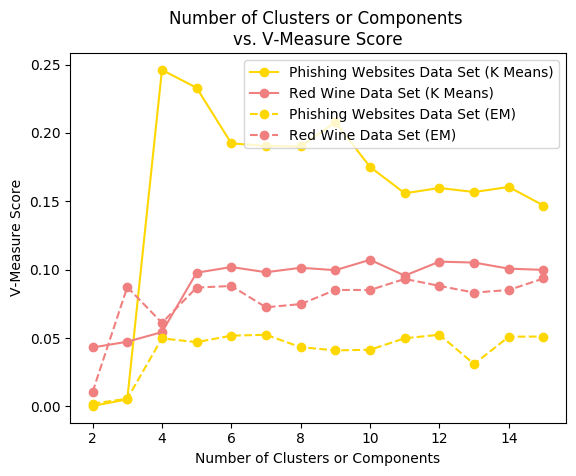

In [533]:
plt.title("Number of Clusters or Components \nvs. V-Measure Score")
plt.xlabel("Number of Clusters or Components")
plt.ylabel("V-Measure Score")
plt.plot(phishing_n_clusters_list, phishing_v_measure_list_k_means, color="gold", marker='o', label="Phishing Websites Data Set (K Means)")
plt.plot(wine_n_clusters_list, wine_v_measure_list_k_means, color="lightcoral", marker='o', label="Red Wine Data Set (K Means)")
plt.plot(phishing_n_clusters_list, phishing_v_measure_list_em, color="gold", marker='o', linestyle="--", label="Phishing Websites Data Set (EM)")
plt.plot(wine_n_clusters_list, wine_v_measure_list_em, color="lightcoral", marker='o', linestyle="--", label="Red Wine Data Set (EM)")
plt.legend(loc='best')
plt.show()

In [15]:
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection 
from scipy.stats import kurtosis

Raw Eigenvalues: 
 [5.268986627821988, 3.9575025585439394, 2.6378147422054483, 1.593131941802816, 1.4194605489018888, 1.1910522224982556, 1.1341103385993492, 1.0949834163494063, 1.0370958518068967, 0.9563827302022725, 0.9092156027487376, 0.9011562674055127, 0.8846269771347625, 0.8153353283235728, 0.7972075656994801, 0.6832308662467864, 0.5870645582858013, 0.5687779930830206, 0.43367990756990765, 0.4214687920356811, 0.4013627021155329, 0.3707727925532562, 0.3268954699074062, 0.30606033335751204, 0.28537802552006464, 0.2397385700311318, 0.21993980118799375, 0.15113089275271932, 0.1285884747461949, 0.051642120966756404]
Percentage of Variance Explained by Each Component: 
 [0.17696726 0.13291899 0.08859518 0.05350786 0.04767483 0.04000337
 0.03809089 0.03677675 0.03483251 0.03212163 0.03053745 0.03026676
 0.0297116  0.02738433 0.02677548 0.02294739 0.01971749 0.01910331
 0.01456583 0.0141557  0.0134804  0.01245299 0.0109793  0.01027952
 0.00958487 0.008052   0.00738703 0.00507597 0.004318

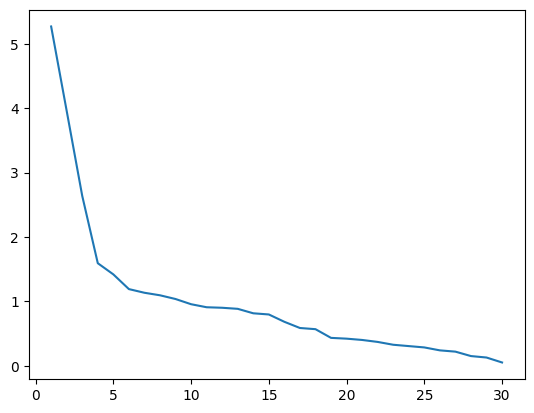

Percentage of Variance Explained by Each Component (sklearn):
 [0.17696726 0.13291899 0.08859518 0.05350786 0.04767483 0.04000337
 0.03809089 0.03677675 0.03483251 0.03212163 0.03053745 0.03026676
 0.0297116  0.02738433 0.02677548 0.02294739 0.01971749 0.01910331
 0.01456583 0.0141557  0.0134804  0.01245299 0.0109793  0.01027952
 0.00958487 0.008052   0.00738703 0.00507597 0.00431885 0.00173448]


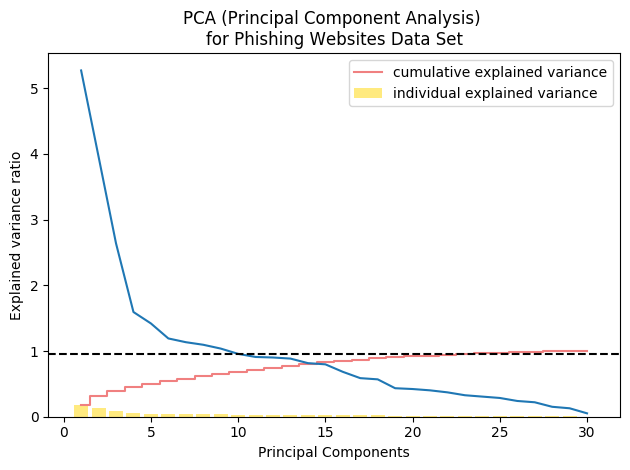

In [695]:
# https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
# https://medium.com/luca-chuangs-bapm-notes/principal-component-analysis-pca-using-python-scikit-learn-48c4c13e49af
cov_mat = np.cov(phishing_X_train.T)

# From this covariance matrix, caluclate the Eigenvalues and the Eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Eigenvalues
eigen_vals = sorted(eigen_vals, reverse=True)
print("Raw Eigenvalues: \n", eigen_vals)
print("Percentage of Variance Explained by Each Component: \n", eigen_vals/sum(eigen_vals))
plt.plot(range(1, len(phishing_dataset.columns)), sorted(eigen_vals, reverse=True))
plt.show()
plt.close()

pca = PCA()
X_train_pca = pca.fit_transform(phishing_X_train)
print("Percentage of Variance Explained by Each Component (sklearn):\n", pca.explained_variance_ratio_)

plt.bar(range(1, len(phishing_dataset.columns)), pca.explained_variance_ratio_, alpha=0.5, align='center', color='gold', label='individual explained variance')
plt.step(range(1, len(phishing_dataset.columns)), np.cumsum(pca.explained_variance_ratio_), where='mid', color='lightcoral', label='cumulative explained variance')
plt.plot(range(1, len(phishing_dataset.columns)), eigen_vals)
plt.title("PCA (Principal Component Analysis) \nfor Phishing Websites Data Set")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')
plt.axhline(y=0.95, color='black', linestyle='--')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Raw Eigenvalues: 
 [3.1097038102696333, 1.8422967761901505, 1.5480194571108743, 1.3583049243600354, 0.9345197402141712, 0.6822306577280962, 0.5922262007160409, 0.43562760810837486, 0.32053356242997827, 0.18438456948850868, 0.06254870021427844]
Percentage of Variance Explained by Each Component: 
 [0.28090267 0.16641652 0.13983415 0.12269705 0.08441611 0.06162658
 0.05349639 0.03935068 0.02895412 0.01665564 0.00565009]


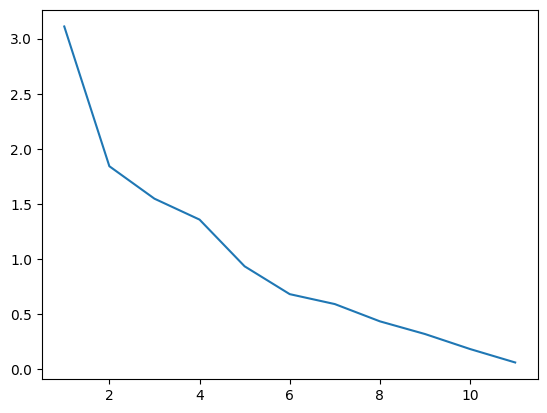

Percentage of Variance Explained by Each Component (sklearn):
 [0.28090267 0.16641652 0.13983415 0.12269705 0.08441611 0.06162658
 0.05349639 0.03935068 0.02895412 0.01665564 0.00565009]


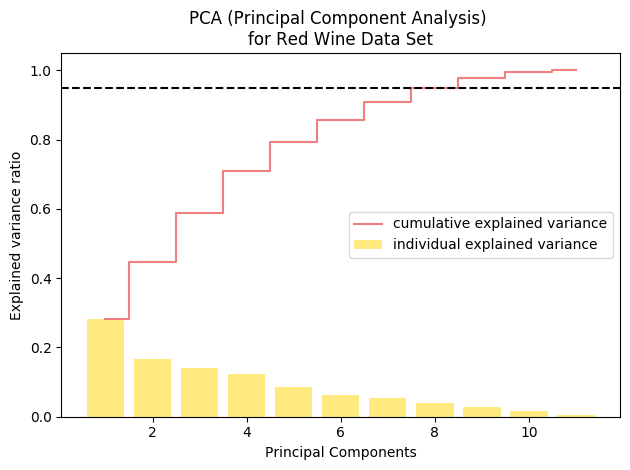

In [391]:
# https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
# https://medium.com/luca-chuangs-bapm-notes/principal-component-analysis-pca-using-python-scikit-learn-48c4c13e49af
cov_mat = np.cov(wine_X_train.T)

# From this covariance matrix, caluclate the Eigenvalues and the Eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Eigenvalues
eigen_vals = sorted(eigen_vals, reverse=True)
print("Raw Eigenvalues: \n", eigen_vals)
print("Percentage of Variance Explained by Each Component: \n", eigen_vals/sum(eigen_vals))
plt.plot(range(1, len(wine_dataset.columns)), sorted(eigen_vals, reverse=True))
plt.show()
plt.close()

pca = PCA()
X_train_pca = pca.fit_transform(wine_X_train)
print("Percentage of Variance Explained by Each Component (sklearn):\n", pca.explained_variance_ratio_)

plt.bar(range(1, len(wine_dataset.columns)), pca.explained_variance_ratio_, alpha=0.5, align='center', color='gold', label='individual explained variance')
plt.step(range(1, len(wine_dataset.columns)), np.cumsum(pca.explained_variance_ratio_), where='mid', color='lightcoral', label='cumulative explained variance')
plt.title("PCA (Principal Component Analysis) \nfor Red Wine Data Set")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')
plt.axhline(y=0.95, color='black', linestyle='--')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Fit a model
pca = PCA(n_components=7)

# fit_transform() to calculate the coordinate system
X_train_pca = pca.fit_transform(wine_X_train)
# transform() to apply that coordinate system
X_test_pca = pca.transform(wine_X_test)

# print("TRAIN RESULTS")
# print(confusion_matrix(wine_Y_train, lr.predict(X_train_pca)))
# print("TEST RESULTS")
# print(confusion_matrix(wine_Y_test, lr.predict(X_test_pca)))

# print("Training Data Overall Accuracy: ",
# accuracy_score(wine_Y_train, lr.predict(wine_X_train)))

# print("Test Data Overall Accuracy: ",
# accuracy_score(wine_Y_test, lr.predict(wine_X_test)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[2.216739172298963, 3.154074730745671, 2.3881493073413598, 1.8446895091246671, 1.6715531487004527, 1.5519859986656626, 1.6708772520414226, 1.6928210368313892, 1.4987375123967785, 1.6523132593472596, 1.6864820101253692, 1.8464181999384772, 1.8439176400533666, 1.8234532999948605, 2.461403208930572, 2.667709614510831, 2.6776628602617456, 2.6631900751158204, 2.911993699644661, 2.866259363779467, 2.8028334112746562, 2.815710735031414, 2.9004152715631433, 3.4595608299564575, 3.969986011251283, 4.399916041717824, 4.842047617617442, 5.275748146237674, 5.979634533971337, 7.4998410172799135]
[0.4645054796742958, 0.7945392757317802, 1.2934201389043871, 9.101079059497902, 9.807063189130393, 9.460848962679362, 10.144105440715075, 12.15586493926471, 11.511868189218449, 11.053812185739602, 10.767134914273973]


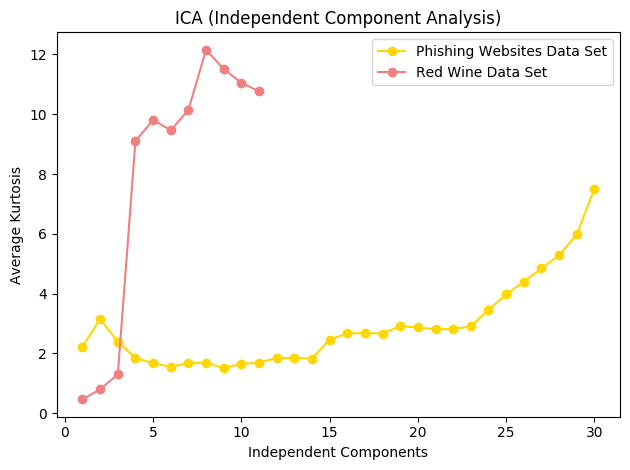

In [319]:
phishing_n_components_list = list(range(1, len(phishing_dataset.columns)))
print(phishing_n_components_list)

phishing_avg_kurtosis = []
phishing_total_kurtosis = []
for n_components in phishing_n_components_list:
    ica = FastICA(n_components=n_components, random_state=random_state)
    transformed_X = ica.fit_transform(phishing_X_train)
    transformed_X_kurtosis = pd.DataFrame(transformed_X).kurtosis(axis=0)
#     print(transformed_X_kurtosis)
    phishing_avg_kurtosis.append(transformed_X_kurtosis.abs().mean())
    phishing_total_kurtosis.append(transformed_X_kurtosis.abs().sum())

wine_n_components_list = list(range(1, len(wine_dataset.columns)))
print(wine_n_components_list)

wine_avg_kurtosis = []
wine_total_kurtosis = []
for n_components in wine_n_components_list:
    ica = FastICA(n_components=n_components, random_state=random_state)
    transformed_X = ica.fit_transform(wine_X_train)
    transformed_X_kurtosis = pd.DataFrame(transformed_X).kurtosis(axis=0)
#     print(transformed_X_kurtosis)
    wine_avg_kurtosis.append(transformed_X_kurtosis.abs().mean())
    wine_total_kurtosis.append(transformed_X_kurtosis.abs().sum())
    
print(phishing_avg_kurtosis)
print(wine_avg_kurtosis)
plt.title("ICA (Independent Component Analysis)")
plt.xlabel("Independent Components")
plt.ylabel("Average Kurtosis")
plt.plot(phishing_n_components_list, phishing_avg_kurtosis, 'gold', marker='o', label="Phishing Websites Data Set")
plt.plot(wine_n_components_list, wine_avg_kurtosis, 'lightcoral', marker='o', label="Red Wine Data Set")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


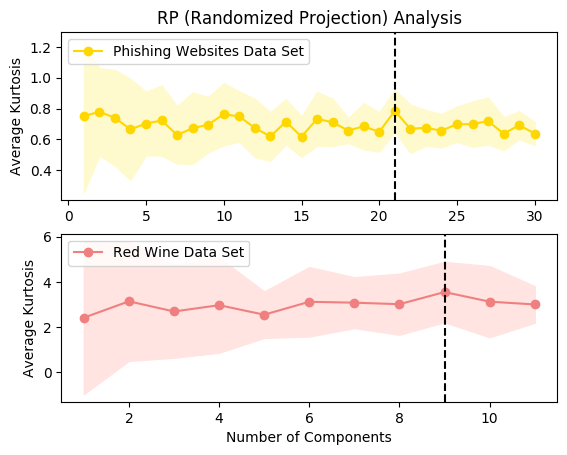

In [356]:
# https://scikit-learn.org/stable/modules/random_projection.html
phishing_n_components_list = list(range(1, len(phishing_dataset.columns)))
phishing_avg_kurtosis_across_runs = []
phishing_avg_kurtosis_variance_1 = []
phishing_avg_kurtosis_variance_2 = []
runs = 20
for n_components in phishing_n_components_list:
    phishing_avg_kurtosis = []
    for run in range(runs):
        transformer = GaussianRandomProjection(n_components=n_components)
        transformed_X = transformer.fit_transform(phishing_X_train)
        transformed_X_kurtosis = pd.DataFrame(transformed_X).kurtosis(axis=0)
        phishing_avg_kurtosis.append(transformed_X_kurtosis.abs().mean())
    phishing_avg_kurtosis_across_runs_for_component = np.mean(phishing_avg_kurtosis)
    phishing_std_kurtosis_across_runs_for_component = np.std(phishing_avg_kurtosis)
    phishing_avg_kurtosis_across_runs.append(phishing_avg_kurtosis_across_runs_for_component)
    phishing_avg_kurtosis_variance_1.append(phishing_avg_kurtosis_across_runs_for_component - phishing_std_kurtosis_across_runs_for_component)
    phishing_avg_kurtosis_variance_2.append(phishing_avg_kurtosis_across_runs_for_component + phishing_std_kurtosis_across_runs_for_component)
    
# https://scikit-learn.org/stable/modules/random_projection.html
wine_n_components_list = list(range(1, len(wine_dataset.columns)))
wine_avg_kurtosis_across_runs = []
wine_avg_kurtosis_variance_1 = []
wine_avg_kurtosis_variance_2 = []
runs = 20
for n_components in wine_n_components_list:
    wine_avg_kurtosis = []
    for run in range(runs):
        transformer = GaussianRandomProjection(n_components=n_components)
        transformed_X = transformer.fit_transform(wine_X_train)
        transformed_X_kurtosis = pd.DataFrame(transformed_X).kurtosis(axis=0)
        wine_avg_kurtosis.append(transformed_X_kurtosis.abs().mean())
    wine_avg_kurtosis_across_runs_for_component = np.mean(wine_avg_kurtosis)
    wine_std_kurtosis_across_runs_for_component = np.std(wine_avg_kurtosis)
    wine_avg_kurtosis_across_runs.append(wine_avg_kurtosis_across_runs_for_component)
    wine_avg_kurtosis_variance_1.append(wine_avg_kurtosis_across_runs_for_component - wine_std_kurtosis_across_runs_for_component)
    wine_avg_kurtosis_variance_2.append(wine_avg_kurtosis_across_runs_for_component + wine_std_kurtosis_across_runs_for_component)

max_value = max(phishing_avg_kurtosis_across_runs)
max_index = phishing_avg_kurtosis_across_runs.index(max_value)
phishing_x = phishing_n_components_list[max_index]

max_value = max(wine_avg_kurtosis_across_runs)
max_index = wine_avg_kurtosis_across_runs.index(max_value)
wine_x = phishing_n_components_list[max_index]

fig, axs = plt.subplots(2)
axs[0].plot(phishing_n_components_list, phishing_avg_kurtosis_across_runs, 'gold', marker='o', label="Phishing Websites Data Set")
axs[0].fill_between(phishing_n_components_list, phishing_avg_kurtosis_variance_1, phishing_avg_kurtosis_variance_2, color="lemonchiffon")
axs[0].axvline(x=phishing_x, color='black', linestyle="--",)
axs[1].plot(wine_n_components_list, wine_avg_kurtosis_across_runs, 'lightcoral', marker='o', label="Red Wine Data Set")
axs[1].fill_between(wine_n_components_list, wine_avg_kurtosis_variance_1, wine_avg_kurtosis_variance_2, color="mistyrose")
axs[1].axvline(x=wine_x, color='black', linestyle="--",)

axs[0].set(title="RP (Randomized Projection) Analysis", ylabel='Average Kurtosis')
axs[0].legend(loc="best")
axs[1].set(xlabel='Number of Components', ylabel='Average Kurtosis')
axs[1].legend(loc="best")
fig.show()

/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


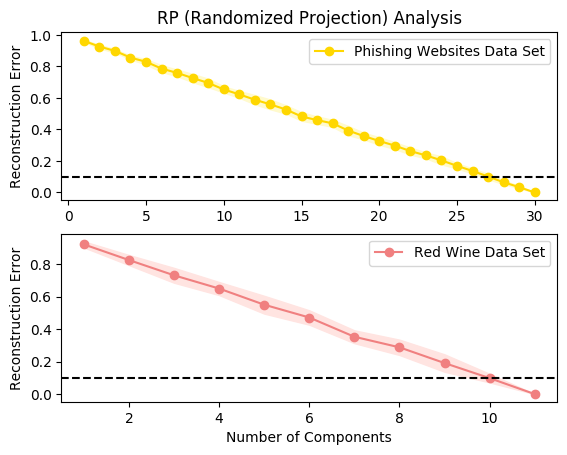

In [357]:
# https://scikit-learn.org/stable/modules/random_projection.html
# https://asifrehan.com/how-to-compute-reconstruction-error-for-random-projection/
phishing_n_components_list = list(range(1, len(phishing_dataset.columns)))
phishing_avg_reconstruction_error_across_runs = []
phishing_avg_reconstruction_error_variance_1 = []
phishing_avg_reconstruction_error_variance_2 = []
runs = 20
for n_components in phishing_n_components_list:
    phishing_reconstruction_error = []
    for run in range(runs):
        random_projection = GaussianRandomProjection(n_components=n_components)
        random_projection.fit(phishing_X_train)
        components =  random_projection.components_
        p_inverse = np.linalg.pinv(components.T)

        reduced_data = random_projection.transform(phishing_X_train)
        reconstructed = reduced_data.dot(p_inverse)
        phishing_reconstruction_error.append(mean_squared_error(phishing_X_train, reconstructed))
    phishing_avg_reconstruction_error_across_runs_per_component = np.mean(phishing_reconstruction_error)
    phishing_std_reconstruction_error_across_runs_per_component = np.std(phishing_reconstruction_error)
    phishing_avg_reconstruction_error_across_runs.append(phishing_avg_reconstruction_error_across_runs_per_component)
    phishing_avg_reconstruction_error_variance_1.append(phishing_avg_reconstruction_error_across_runs_per_component - phishing_std_reconstruction_error_across_runs_per_component)
    phishing_avg_reconstruction_error_variance_2.append(phishing_avg_reconstruction_error_across_runs_per_component + phishing_std_reconstruction_error_across_runs_per_component)
    
# https://scikit-learn.org/stable/modules/random_projection.html
# https://asifrehan.com/how-to-compute-reconstruction-error-for-random-projection/
wine_n_components_list = list(range(1, len(wine_dataset.columns)))
wine_avg_reconstruction_error_across_runs = []
wine_avg_reconstruction_error_variance_1 = []
wine_avg_reconstruction_error_variance_2 = []
runs = 20
for n_components in wine_n_components_list:
    wine_reconstruction_error = []
    for run in range(runs):
        random_projection = GaussianRandomProjection(n_components=n_components)
        random_projection.fit(wine_X_train)
        components =  random_projection.components_
        p_inverse = np.linalg.pinv(components.T)

        reduced_data = random_projection.transform(wine_X_train)
        reconstructed = reduced_data.dot(p_inverse)
        wine_reconstruction_error.append(mean_squared_error(wine_X_train, reconstructed))
    wine_avg_reconstruction_error_across_runs_per_component = np.mean(wine_reconstruction_error)
    wine_std_reconstruction_error_across_runs_per_component = np.std(wine_reconstruction_error)
    wine_avg_reconstruction_error_across_runs.append(wine_avg_reconstruction_error_across_runs_per_component)
    wine_avg_reconstruction_error_variance_1.append(wine_avg_reconstruction_error_across_runs_per_component - wine_std_reconstruction_error_across_runs_per_component)
    wine_avg_reconstruction_error_variance_2.append(wine_avg_reconstruction_error_across_runs_per_component + wine_std_reconstruction_error_across_runs_per_component)
    

fig, axs = plt.subplots(2)
# fig.suptitle("RP (Randomized Projection) Analysis")
axs[0].plot(phishing_n_components_list, phishing_avg_reconstruction_error_across_runs, 'gold', marker='o', label="Phishing Websites Data Set")
axs[0].fill_between(phishing_n_components_list, phishing_avg_reconstruction_error_variance_1, phishing_avg_reconstruction_error_variance_2, color="lemonchiffon")
axs[0].axhline(y=0.1, color='black', linestyle="--")
axs[1].plot(wine_n_components_list, wine_avg_reconstruction_error_across_runs, 'lightcoral', marker='o', label="Red Wine Data Set")
axs[1].fill_between(wine_n_components_list, wine_avg_reconstruction_error_variance_1, wine_avg_reconstruction_error_variance_2, color="mistyrose")
axs[1].axhline(y=0.1, color='black', linestyle="--")

axs[0].set(title='RP (Randomized Projection) Analysis', ylabel='Reconstruction Error')
axs[0].legend(loc="best")
axs[1].set(xlabel='Number of Components', ylabel='Reconstruction Error')
axs[1].legend(loc="best")
fig.show()

   Component  explained_variance_ratio  cum_explained_variance_ratio
0          1                  0.831661                      0.831661
1          2                  0.108715                      0.940375
2          3                  0.040693                      0.981068
3          4                  0.011874                      0.992942
4          5                  0.007058                      1.000000

3 Discriminant Components explain 98.11% of variability between CLASSES
   Component  explained_variance_ratio  cum_explained_variance_ratio
0          1                       1.0                           1.0

1 Discriminant Components explain 100.0% of variability between CLASSES


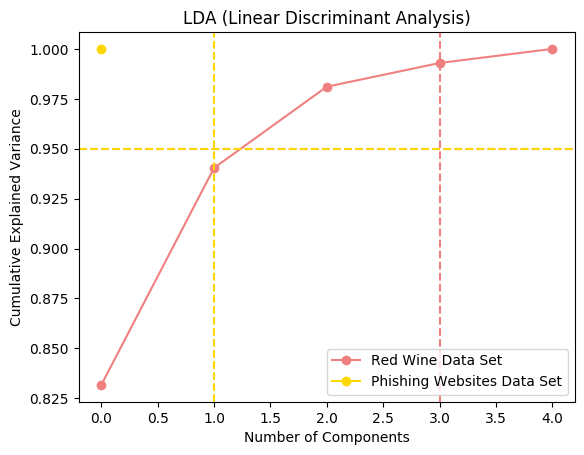

In [389]:
# https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
# https://365datascience.com/tutorials/python-tutorials/lda-vs-pca/
# https://chrisalbon.com/code/machine_learning/feature_engineering/select_best_number_of_components_in_lda/

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(wine_X_train, wine_Y_train)
np_cum_lda = np.cumsum(lda.explained_variance_ratio_)
df_cum_lda = pd.DataFrame({'Component':[i for i in range(1,np_cum_lda.shape[0]+1)],'explained_variance_ratio':lda.explained_variance_ratio_,'cum_explained_variance_ratio':np_cum_lda})
print(df_cum_lda)
filter = df_cum_lda[df_cum_lda.cum_explained_variance_ratio>0.95].iloc[0]
component = int(filter.Component)
cum_var = float(filter.cum_explained_variance_ratio)
print(f"\n{component} Discriminant Components explain {round(cum_var,4)*100}% of variability between CLASSES")

plt.title("LDA (Linear Discriminant Analysis)")
plt.plot(np.cumsum(lda.explained_variance_ratio_), 'lightcoral', marker='o', label="Red Wine Data Set")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');
plt.axhline(y=threshold, color = 'lightcoral', linestyle = '--')
plt.axvline(x=component, color = 'lightcoral', linestyle = '--')

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(phishing_X_train, phishing_Y_train)
np_cum_lda = np.cumsum(lda.explained_variance_ratio_)
df_cum_lda = pd.DataFrame({'Component':[i for i in range(1,np_cum_lda.shape[0]+1)],'explained_variance_ratio':lda.explained_variance_ratio_,'cum_explained_variance_ratio':np_cum_lda})
print(df_cum_lda)
filter = df_cum_lda[df_cum_lda.cum_explained_variance_ratio>0.95].iloc[0]
component = int(filter.Component)
cum_var = float(filter.cum_explained_variance_ratio)
print(f"\n{component} Discriminant Components explain {round(cum_var,4)*100}% of variability between CLASSES")

plt.plot(np.cumsum(lda.explained_variance_ratio_), 'gold', marker='o', label="Phishing Websites Data Set")
plt.axhline(y=threshold, color = 'gold', linestyle = '--')
plt.axvline(x=component, color = 'gold', linestyle = '--')

plt.legend(loc="best")
plt.show()
plt.close()

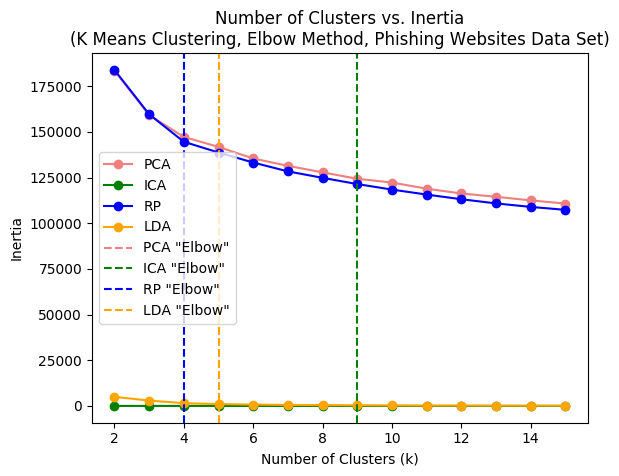

In [673]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
n_init = 10
max_iter = 300
init = "k-means++"

# Phishing: None, clusters = 5
kmeans = KMeans(n_clusters=5, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)
start_time = time.time()
predicted_labels = kmeans.fit(phishing_X_train).predict(phishing_X_train)
end_time = time.time()
final_time = end_time - start_time
silhouette = silhouette_score(phishing_X_train, predicted_labels, metric="euclidean", random_state=random_state)
homogeneity_score, completeness_score, v_measure_score = homogeneity_completeness_v_measure(phishing_Y_train, predicted_labels)

# Phishing: PCA, clusters = 5
phishing_pca_inertia_list_k_means = []
pca = PCA(n_components=22, random_state=random_state).fit_transform(phishing_X_train)
for n_clusters in phishing_n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)
    predicted_labels = kmeans.fit(pca).predict(pca)
    phishing_pca_inertia_k_means = kmeans.inertia_
    phishing_pca_inertia_list_k_means.append(phishing_pca_inertia_k_means)
kmeans = KMeans(n_clusters=5, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)
start_time = time.time()
predicted_labels = kmeans.fit(pca).predict(pca)
end_time = time.time()
pca_final_time = end_time - start_time
pca_silhouette = silhouette_score(phishing_X_train, predicted_labels, metric="euclidean", random_state=random_state)
pca_homogeneity_score, pca_completeness_score, pca_v_measure_score = homogeneity_completeness_v_measure(phishing_Y_train, predicted_labels)

# # Phishing: ICA, clusters = 9
phishing_ica_inertia_list_k_means = []
ica = FastICA(n_components=28, random_state=random_state).fit_transform(phishing_X_train)
for n_clusters in phishing_n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)
    predicted_labels = kmeans.fit(ica).predict(ica)
    phishing_ica_inertia_k_means = kmeans.inertia_
    phishing_ica_inertia_list_k_means.append(phishing_ica_inertia_k_means)
kmeans = KMeans(n_clusters=9, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)
start_time = time.time()
predicted_labels = kmeans.fit(ica).predict(ica)
end_time = time.time()
ica_final_time = end_time - start_time
ica_silhouette = silhouette_score(phishing_X_train, predicted_labels, metric="euclidean", random_state=random_state)
ica_homogeneity_score, ica_completeness_score, ica_v_measure_score = homogeneity_completeness_v_measure(phishing_Y_train, predicted_labels)
    
# Phishing: RP, components = 4
phishing_rp_inertia_list_k_means = []
rp = GaussianRandomProjection(n_components=27, random_state=random_state).fit_transform(phishing_X_train)
for n_clusters in phishing_n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)
    predicted_labels = kmeans.fit(rp).predict(rp)
    phishing_rp_inertia_k_means = kmeans.inertia_
    phishing_rp_inertia_list_k_means.append(phishing_rp_inertia_k_means)
kmeans = KMeans(n_clusters=4, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)
start_time = time.time()
predicted_labels = kmeans.fit(rp).predict(rp)
end_time = time.time()
rp_final_time = end_time - start_time
rp_silhouette = silhouette_score(phishing_X_train, predicted_labels, metric="euclidean", random_state=random_state)
rp_homogeneity_score, rp_completeness_score, rp_v_measure_score = homogeneity_completeness_v_measure(phishing_Y_train, predicted_labels)

# Phishing: LDA, components = 5
phishing_lda_inertia_list_k_means = []
lda = LinearDiscriminantAnalysis(n_components=1).fit_transform(phishing_X_train, phishing_Y_train)
for n_clusters in phishing_n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)
    predicted_labels = kmeans.fit(lda).predict(lda)
    phishing_lda_inertia_k_means = kmeans.inertia_
    phishing_lda_inertia_list_k_means.append(phishing_lda_inertia_k_means)
kmeans = KMeans(n_clusters=5, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)
start_time = time.time()
predicted_labels = kmeans.fit(lda).predict(lda)
end_time = time.time()
lda_final_time = end_time - start_time
lda_silhouette = silhouette_score(phishing_X_train, predicted_labels, metric="euclidean", random_state=random_state)
lda_homogeneity_score, lda_completeness_score, lda_v_measure_score = homogeneity_completeness_v_measure(phishing_Y_train, predicted_labels)

plt.title("Number of Clusters vs. Inertia\n(K Means Clustering, Elbow Method, Phishing Websites Data Set)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.plot(phishing_n_clusters_list, phishing_pca_inertia_list_k_means, color="lightcoral", marker='o', label="PCA")
plt.plot(phishing_n_clusters_list, phishing_ica_inertia_list_k_means, color="green", marker='o', label="ICA")
plt.plot(phishing_n_clusters_list, phishing_rp_inertia_list_k_means, color="blue", marker='o', label="RP")
plt.plot(phishing_n_clusters_list, phishing_lda_inertia_list_k_means, color="orange", marker='o', label="LDA")

from kneed import KneeLocator, DataGenerator as dg
knees1 = []
knees2 = []
knees3 = []
knees4 = []
k1 = KneeLocator(phishing_n_clusters_list, phishing_pca_inertia_list_k_means, curve="convex", direction="decreasing")
k2 = KneeLocator(phishing_n_clusters_list, phishing_ica_inertia_list_k_means, curve="convex", direction="decreasing")
k3 = KneeLocator(phishing_n_clusters_list, phishing_rp_inertia_list_k_means, curve="convex", direction="decreasing")
k4 = KneeLocator(phishing_n_clusters_list, phishing_lda_inertia_list_k_means, curve="convex", direction="decreasing")
knees1.append(kl.knee)
knees2.append(k2.knee)
knees3.append(k3.knee)
knees4.append(k4.knee)
plt.axvline(knees1[0], color='lightcoral', linestyle="--", label='PCA "Elbow"')
plt.axvline(knees2[0], color='green', linestyle="--", label='ICA "Elbow"')
plt.axvline(knees3[0], color='blue', linestyle="--", label='RP "Elbow"')
plt.axvline(knees4[0], color='orange', linestyle="--", label='LDA "Elbow"')
plt.legend(loc='best')
plt.show()

In [675]:
k_means_phishing_data = {'Algorithm': ['None', 'PCA', 'ICA', 'RP', 'LDA'],
        'Homogeneity<br> Score': [homogeneity_score, pca_homogeneity_score, ica_homogeneity_score, rp_homogeneity_score, lda_homogeneity_score],
        'Completeness<br> Score': [completeness_score, pca_completeness_score, ica_completeness_score, rp_completeness_score, lda_completeness_score],
        'V-measure<br> Score': [v_measure_score, pca_v_measure_score, ica_v_measure_score, rp_v_measure_score, lda_v_measure_score],
        'Time': [final_time, pca_final_time, ica_final_time, rp_final_time, lda_final_time],}
       
df = pd.DataFrame(k_means_phishing_data)
styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "150%"),
                              ("color", 'black')])]

df = df.style.set_caption("K-Means After Dimensionality Reduction<br>(Phishing Websites Data Set)").set_table_styles(styles)
df

,Algorithm,Homogeneity Score,Completeness Score,V-measure Score,Time
0,None,0.344278,0.176145,0.233052,0.184038
1,PCA,0.296951,0.137235,0.187717,0.200516
2,ICA,0.061146,0.022583,0.032985,0.304521
3,RP,0.044709,0.025816,0.032732,0.154443
4,LDA,0.692612,0.298348,0.417048,0.078131


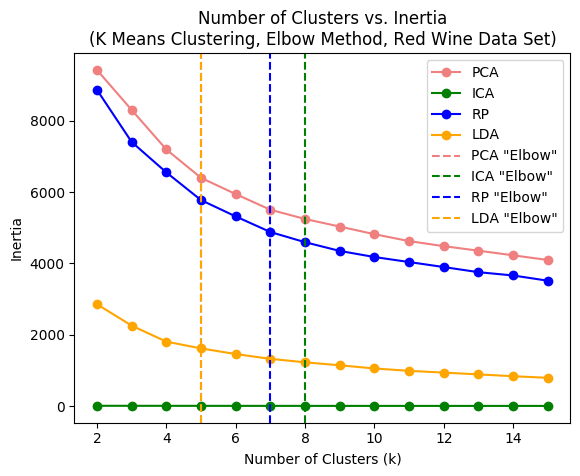

In [668]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
n_init = 10
max_iter = 300
init = "k-means++"

# Wine: None, clusters = 7
kmeans = KMeans(n_clusters=7, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)
start_time = time.time()
predicted_labels = kmeans.fit(wine_X_train).predict(wine_X_train)
end_time = time.time()
final_time = end_time - start_time
silhouette = silhouette_score(wine_X_train, predicted_labels, metric="euclidean", random_state=random_state)
homogeneity_score, completeness_score, v_measure_score = homogeneity_completeness_v_measure(wine_Y_train, predicted_labels)

# Wine: PCA, clusters = 5
wine_pca_inertia_list_k_means = []
pca = PCA(n_components=8, random_state=random_state).fit_transform(wine_X_train)
for n_clusters in wine_n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)
    predicted_labels = kmeans.fit(pca).predict(pca)
    wine_pca_inertia_k_means = kmeans.inertia_
    wine_pca_inertia_list_k_means.append(wine_pca_inertia_k_means)
kmeans = KMeans(n_clusters=5, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)
start_time = time.time()
predicted_labels = kmeans.fit(pca).predict(pca)
end_time = time.time()
pca_final_time = end_time - start_time
pca_silhouette = silhouette_score(wine_X_train, predicted_labels, metric="euclidean", random_state=random_state)
pca_homogeneity_score, pca_completeness_score, pca_v_measure_score = homogeneity_completeness_v_measure(wine_Y_train, predicted_labels)

# # Wine: ICA, clusters = 7
wine_ica_inertia_list_k_means = []
ica = FastICA(n_components=8, random_state=random_state).fit_transform(wine_X_train)
for n_clusters in wine_n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)
    predicted_labels = kmeans.fit(ica).predict(ica)
    wine_ica_inertia_k_means = kmeans.inertia_
    wine_ica_inertia_list_k_means.append(wine_ica_inertia_k_means)
kmeans = KMeans(n_clusters=7, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)
start_time = time.time()
predicted_labels = kmeans.fit(ica).predict(ica)
end_time = time.time()
ica_final_time = end_time - start_time
ica_silhouette = silhouette_score(wine_X_train, predicted_labels, metric="euclidean", random_state=random_state)
ica_homogeneity_score, ica_completeness_score, ica_v_measure_score = homogeneity_completeness_v_measure(wine_Y_train, predicted_labels)
    
# Wine: RP, components = 8
wine_rp_inertia_list_k_means = []
rp = GaussianRandomProjection(n_components=10, random_state=random_state).fit_transform(wine_X_train)
for n_clusters in wine_n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)
    predicted_labels = kmeans.fit(rp).predict(rp)
    wine_rp_inertia_k_means = kmeans.inertia_
    wine_rp_inertia_list_k_means.append(wine_rp_inertia_k_means)
kmeans = KMeans(n_clusters=8, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)
start_time = time.time()
predicted_labels = kmeans.fit(rp).predict(rp)
end_time = time.time()
rp_final_time = end_time - start_time
rp_silhouette = silhouette_score(wine_X_train, predicted_labels, metric="euclidean", random_state=random_state)
rp_homogeneity_score, rp_completeness_score, rp_v_measure_score = homogeneity_completeness_v_measure(wine_Y_train, predicted_labels)

# Wine: LDA, components = 5
wine_lda_inertia_list_k_means = []
lda = LinearDiscriminantAnalysis(n_components=3).fit_transform(wine_X_train, wine_Y_train)
for n_clusters in wine_n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)
    predicted_labels = kmeans.fit(lda).predict(lda)
    wine_lda_inertia_k_means = kmeans.inertia_
    wine_lda_inertia_list_k_means.append(wine_lda_inertia_k_means)
kmeans = KMeans(n_clusters=5, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)
start_time = time.time()
predicted_labels = kmeans.fit(lda).predict(lda)
end_time = time.time()
lda_final_time = end_time - start_time
lda_silhouette = silhouette_score(wine_X_train, predicted_labels, metric="euclidean", random_state=random_state)
lda_homogeneity_score, lda_completeness_score, lda_v_measure_score = homogeneity_completeness_v_measure(wine_Y_train, predicted_labels)

plt.title("Number of Clusters vs. Inertia\n(K Means Clustering, Elbow Method, Red Wine Data Set)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.plot(wine_n_clusters_list, wine_pca_inertia_list_k_means, color="lightcoral", marker='o', label="PCA")
plt.plot(wine_n_clusters_list, wine_ica_inertia_list_k_means, color="green", marker='o', label="ICA")
plt.plot(wine_n_clusters_list, wine_rp_inertia_list_k_means, color="blue", marker='o', label="RP")
plt.plot(wine_n_clusters_list, wine_lda_inertia_list_k_means, color="orange", marker='o', label="LDA")

from kneed import KneeLocator, DataGenerator as dg
knees1 = []
knees2 = []
knees3 = []
knees4 = []
k1 = KneeLocator(wine_n_clusters_list, wine_pca_inertia_list_k_means, curve="convex", direction="decreasing")
k2 = KneeLocator(wine_n_clusters_list, wine_ica_inertia_list_k_means, curve="convex", direction="decreasing")
k3 = KneeLocator(wine_n_clusters_list, wine_rp_inertia_list_k_means, curve="convex", direction="decreasing")
k4 = KneeLocator(wine_n_clusters_list, wine_lda_inertia_list_k_means, curve="convex", direction="decreasing")
knees1.append(kl.knee)
knees2.append(k2.knee)
knees3.append(k3.knee)
knees4.append(k4.knee)
plt.axvline(knees1[0], color='lightcoral', linestyle="--", label='PCA "Elbow"')
plt.axvline(knees2[0], color='green', linestyle="--", label='ICA "Elbow"')
plt.axvline(knees3[0], color='blue', linestyle="--", label='RP "Elbow"')
plt.axvline(knees4[0], color='orange', linestyle="--", label='LDA "Elbow"')
plt.legend(loc='best')
plt.show()

In [669]:
k_means_wine_data = {'Algorithm': ['None', 'PCA', 'ICA', 'RP', 'LDA'],
        'Homogeneity<br> Score': [homogeneity_score, pca_homogeneity_score, ica_homogeneity_score, rp_homogeneity_score, lda_homogeneity_score],
        'Completeness<br> Score': [completeness_score, pca_completeness_score, ica_completeness_score, rp_completeness_score, lda_completeness_score],
        'V-measure<br> Score': [v_measure_score, pca_v_measure_score, ica_v_measure_score, rp_v_measure_score, lda_v_measure_score],
        'Time': [final_time, pca_final_time, ica_final_time, rp_final_time, lda_final_time],}

df = pd.DataFrame(k_means_wine_data)
styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "150%"),
                              ("color", 'black')])]

df = df.style.set_caption("K-Means After Dimensionality Reduction<br>(Red Wine Data Set)").set_table_styles(styles)
df

,Algorithm,Homogeneity Score,Completeness Score,V-measure Score,Time
0,None,0.119689,0.083139,0.098121,0.082957
1,PCA,0.107224,0.088839,0.097169,0.061516
2,ICA,0.122758,0.082309,0.098544,0.107521
3,RP,0.074638,0.046862,0.057575,0.144103
4,LDA,0.157194,0.120380,0.136346,0.083094


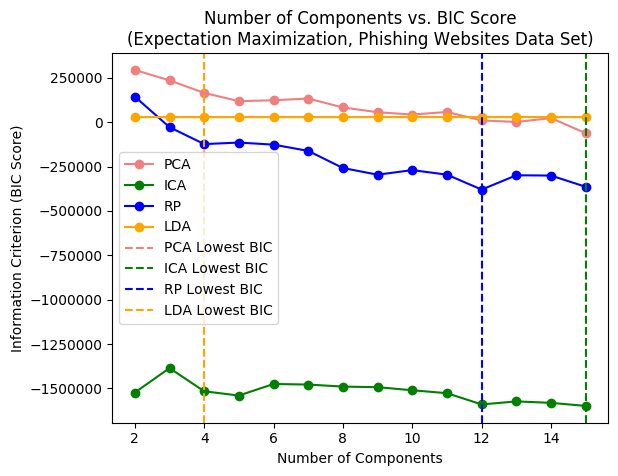

In [694]:
# Phishing: None, clusters = 5
em = GaussianMixture(n_components=5, random_state=random_state)
start_time = time.time()
predicted_labels = em.fit(phishing_X_train).predict(phishing_X_train)
end_time = time.time()
final_time = end_time - start_time
silhouette = silhouette_score(phishing_X_train, predicted_labels, metric="euclidean", random_state=random_state)
homogeneity_score, completeness_score, v_measure_score = homogeneity_completeness_v_measure(phishing_Y_train, predicted_labels)

# Phishing: PCA, components = 15
phishing_pca_BIC_list_em = []
phishing_pca_AIC_list_em = []
pca = PCA(n_components=22, random_state=random_state).fit_transform(phishing_X_train)
for n_clusters in phishing_n_clusters_list:
    em = GaussianMixture(n_components=n_clusters, random_state=random_state)
    predicted_labels = em.fit(pca).predict(pca)
    phishing_pca_BIC_em = em.bic(pca)
    phishing_pca_AIC_em = em.aic(pca)
    phishing_pca_BIC_list_em.append(phishing_pca_BIC_em)
    phishing_pca_AIC_list_em.append(phishing_pca_AIC_em)
em = GaussianMixture(n_components=15, random_state=random_state)
start_time = time.time()
predicted_labels = em.fit(pca).predict(pca)
end_time = time.time()
pca_final_time = end_time - start_time
pca_silhouette = silhouette_score(phishing_X_train, predicted_labels, metric="euclidean", random_state=random_state)
pca_homogeneity_score, pca_completeness_score, pca_v_measure_score = homogeneity_completeness_v_measure(phishing_Y_train, predicted_labels)

# Phishing: ICA, components = 15
phishing_ica_BIC_list_em = []
phishing_ica_AIC_list_em = []
ica = FastICA(n_components=28, random_state=random_state).fit_transform(phishing_X_train)
for n_clusters in phishing_n_clusters_list:
    em = GaussianMixture(n_components=n_clusters, random_state=random_state)
    predicted_labels = em.fit(ica).predict(ica)
    phishing_ica_BIC_em = em.bic(ica)
    phishing_ica_AIC_em = em.aic(ica)
    phishing_ica_BIC_list_em.append(phishing_ica_BIC_em)
    phishing_ica_AIC_list_em.append(phishing_ica_AIC_em)
em = GaussianMixture(n_components=15, random_state=random_state)
start_time = time.time()
predicted_labels = em.fit(ica).predict(ica)
end_time = time.time()
ica_final_time = end_time - start_time
ica_silhouette = silhouette_score(phishing_X_train, predicted_labels, metric="euclidean", random_state=random_state)
ica_homogeneity_score, ica_completeness_score, ica_v_measure_score = homogeneity_completeness_v_measure(phishing_Y_train, predicted_labels)
    
# Phishing: RP, components = 12
phishing_rp_BIC_list_em = []
phishing_rp_AIC_list_em = []
rp = GaussianRandomProjection(n_components=27, random_state=random_state).fit_transform(phishing_X_train)
for n_clusters in phishing_n_clusters_list:
    em = GaussianMixture(n_components=n_clusters, random_state=random_state)
    predicted_labels = em.fit(rp).predict(rp)
    phishing_rp_BIC_em = em.bic(rp)
    phishing_rp_AIC_em = em.aic(rp)
    phishing_rp_BIC_list_em.append(phishing_rp_BIC_em)
    phishing_rp_AIC_list_em.append(phishing_rp_AIC_em)
em = GaussianMixture(n_components=12, random_state=random_state)
start_time = time.time()
predicted_labels = em.fit(rp).predict(rp)
end_time = time.time()
rp_final_time = end_time - start_time
rp_silhouette = silhouette_score(phishing_X_train, predicted_labels, metric="euclidean", random_state=random_state)
rp_homogeneity_score, rp_completeness_score, rp_v_measure_score = homogeneity_completeness_v_measure(phishing_Y_train, predicted_labels)

# Phishing: LDA, components = 4
phishing_lda_BIC_list_em = []
phishing_lda_AIC_list_em = []
lda = LinearDiscriminantAnalysis(n_components=1).fit_transform(phishing_X_train, phishing_Y_train)
for n_clusters in phishing_n_clusters_list:
    em = GaussianMixture(n_components=n_clusters, random_state=random_state)
    predicted_labels = em.fit(lda).predict(lda)
    phishing_lda_BIC_em = em.bic(lda)
    phishing_lda_AIC_em = em.aic(lda)
    phishing_lda_BIC_list_em.append(phishing_lda_BIC_em)
    phishing_lda_AIC_list_em.append(phishing_lda_AIC_em)
em = GaussianMixture(n_components=4, random_state=random_state)
start_time = time.time()
predicted_labels = em.fit(lda).predict(lda)
end_time = time.time()
lda_final_time = end_time - start_time
lda_silhouette = silhouette_score(phishing_X_train, predicted_labels, metric="euclidean", random_state=random_state)
lda_homogeneity_score, lda_completeness_score, lda_v_measure_score = homogeneity_completeness_v_measure(phishing_Y_train, predicted_labels)

min_value = min(phishing_pca_BIC_list_em)
min_index = phishing_pca_BIC_list_em.index(min_value)
phishing_pca_BIC = phishing_n_clusters_list[min_index]

min_value = min(phishing_ica_BIC_list_em)
min_index = phishing_ica_BIC_list_em.index(min_value)
phishing_ica_BIC = phishing_n_clusters_list[min_index]

min_value = min(phishing_rp_BIC_list_em)
min_index = phishing_rp_BIC_list_em.index(min_value)
phishing_rp_BIC = phishing_n_clusters_list[min_index]

min_value = min(phishing_lda_BIC_list_em)
min_index = phishing_lda_BIC_list_em.index(min_value)
phishing_lda_BIC = phishing_n_clusters_list[min_index]

plt.title("Number of Components vs. BIC Score\n(Expectation Maximization, Phishing Websites Data Set)")
plt.xlabel("Number of Components")
plt.ylabel("Information Criterion (BIC Score)")
plt.plot(phishing_n_clusters_list, phishing_pca_BIC_list_em, color="lightcoral", marker='o', label="PCA")
plt.plot(phishing_n_clusters_list, phishing_ica_BIC_list_em, color="green", marker='o', label="ICA")
plt.plot(phishing_n_clusters_list, phishing_rp_BIC_list_em, color="blue", marker='o', label="RP")
plt.plot(phishing_n_clusters_list, phishing_lda_BIC_list_em, color="orange", marker='o', label="LDA")
plt.axvline(x=phishing_pca_BIC, color='lightcoral', linestyle="--",label="PCA Lowest BIC")
plt.axvline(x=phishing_ica_BIC, color='green', linestyle="--",label="ICA Lowest BIC")
plt.axvline(x=phishing_rp_BIC, color='blue', linestyle="--",label="RP Lowest BIC")
plt.axvline(x=phishing_lda_BIC, color='orange', linestyle="--",label="LDA Lowest BIC")
plt.legend(loc='best')
plt.show()
plt.close()

In [686]:
em_phishing_data = {'Algorithm': ['None', 'PCA', 'ICA', 'RP', 'LDA'],
        'Homogeneity<br> Score': [homogeneity_score, pca_homogeneity_score, ica_homogeneity_score, rp_homogeneity_score, lda_homogeneity_score],
        'Completeness<br> Score': [completeness_score, pca_completeness_score, ica_completeness_score, rp_completeness_score, lda_completeness_score],
        'V-measure<br> Score': [v_measure_score, pca_v_measure_score, ica_v_measure_score, rp_v_measure_score, lda_v_measure_score],
        'Time': [final_time, pca_final_time, ica_final_time, rp_final_time, lda_final_time],}
       
df = pd.DataFrame(em_phishing_data)
styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "150%"),
                              ("color", 'black')])]

df = df.style.set_caption("EM After Dimensionality Reduction<br>(Phishing Websites Data Set)").set_table_styles(styles)
df

,Algorithm,Homogeneity Score,Completeness Score,V-measure Score,Time
0,None,0.068886,0.035640,0.046976,0.699283
1,PCA,0.115884,0.034754,0.053472,2.856205
2,ICA,0.170746,0.045262,0.071556,2.239496
3,RP,0.103353,0.033108,0.050150,1.118701
4,LDA,0.669395,0.338531,0.449658,0.020363


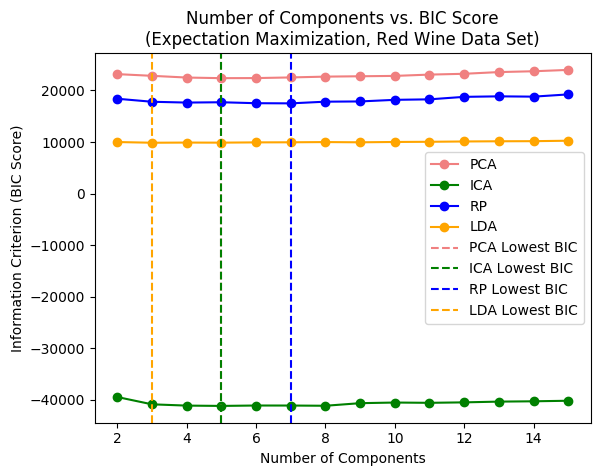

In [693]:
# Wine: None, clusters = 14
em = GaussianMixture(n_components=14, random_state=random_state)
start_time = time.time()
predicted_labels = em.fit(wine_X_train).predict(wine_X_train)
end_time = time.time()
final_time = end_time - start_time
silhouette = silhouette_score(wine_X_train, predicted_labels, metric="euclidean", random_state=random_state)
homogeneity_score, completeness_score, v_measure_score = homogeneity_completeness_v_measure(wine_Y_train, predicted_labels)

# Wine: PCA, components = 5
wine_pca_BIC_list_em = []
wine_pca_AIC_list_em = []
pca = PCA(n_components=8, random_state=random_state).fit_transform(wine_X_train)
for n_clusters in wine_n_clusters_list:
    em = GaussianMixture(n_components=n_clusters, random_state=random_state)
    predicted_labels = em.fit(pca).predict(pca)
    wine_pca_BIC_em = em.bic(pca)
    wine_pca_AIC_em = em.aic(pca)
    wine_pca_BIC_list_em.append(wine_pca_BIC_em)
    wine_pca_AIC_list_em.append(wine_pca_AIC_em)
em = GaussianMixture(n_components=5, random_state=random_state)
start_time = time.time()
predicted_labels = em.fit(pca).predict(pca)
end_time = time.time()
pca_final_time = end_time - start_time
pca_silhouette = silhouette_score(wine_X_train, predicted_labels, metric="euclidean", random_state=random_state)
pca_homogeneity_score, pca_completeness_score, pca_v_measure_score = homogeneity_completeness_v_measure(wine_Y_train, predicted_labels)

# Wine: ICA, components = 5
wine_ica_BIC_list_em = []
wine_ica_AIC_list_em = []
ica = FastICA(n_components=8, random_state=random_state).fit_transform(wine_X_train)
for n_clusters in wine_n_clusters_list:
    em = GaussianMixture(n_components=n_clusters, random_state=random_state)
    predicted_labels = em.fit(ica).predict(ica)
    wine_ica_BIC_em = em.bic(ica)
    wine_ica_AIC_em = em.aic(ica)
    wine_ica_BIC_list_em.append(wine_ica_BIC_em)
    wine_ica_AIC_list_em.append(wine_ica_AIC_em)
em = GaussianMixture(n_components=5, random_state=random_state)
start_time = time.time()
predicted_labels = em.fit(ica).predict(ica)
end_time = time.time()
ica_final_time = end_time - start_time
ica_silhouette = silhouette_score(wine_X_train, predicted_labels, metric="euclidean", random_state=random_state)
ica_homogeneity_score, ica_completeness_score, ica_v_measure_score = homogeneity_completeness_v_measure(wine_Y_train, predicted_labels)
    
# Wine: RP, components = 7
wine_rp_BIC_list_em = []
wine_rp_AIC_list_em = []
rp = GaussianRandomProjection(n_components=10, random_state=random_state).fit_transform(wine_X_train)
for n_clusters in wine_n_clusters_list:
    em = GaussianMixture(n_components=n_clusters, random_state=random_state)
    predicted_labels = em.fit(rp).predict(rp)
    wine_rp_BIC_em = em.bic(rp)
    wine_rp_AIC_em = em.aic(rp)
    wine_rp_BIC_list_em.append(wine_rp_BIC_em)
    wine_rp_AIC_list_em.append(wine_rp_AIC_em)
em = GaussianMixture(n_components=7, random_state=random_state)
start_time = time.time()
predicted_labels = em.fit(rp).predict(rp)
end_time = time.time()
rp_final_time = end_time - start_time
rp_silhouette = silhouette_score(wine_X_train, predicted_labels, metric="euclidean", random_state=random_state)
rp_homogeneity_score, rp_completeness_score, rp_v_measure_score = homogeneity_completeness_v_measure(wine_Y_train, predicted_labels)

# Wine: LDA, components = 3
wine_lda_BIC_list_em = []
wine_lda_AIC_list_em = []
lda = LinearDiscriminantAnalysis(n_components=3).fit_transform(wine_X_train, wine_Y_train)
for n_clusters in wine_n_clusters_list:
    em = GaussianMixture(n_components=n_clusters, random_state=random_state)
    predicted_labels = em.fit(lda).predict(lda)
    wine_lda_BIC_em = em.bic(lda)
    wine_lda_AIC_em = em.aic(lda)
    wine_lda_BIC_list_em.append(wine_lda_BIC_em)
    wine_lda_AIC_list_em.append(wine_lda_AIC_em)
em = GaussianMixture(n_components=3, random_state=random_state)
start_time = time.time()
predicted_labels = em.fit(lda).predict(lda)
end_time = time.time()
lda_final_time = end_time - start_time
lda_silhouette = silhouette_score(wine_X_train, predicted_labels, metric="euclidean", random_state=random_state)
lda_homogeneity_score, lda_completeness_score, lda_v_measure_score = homogeneity_completeness_v_measure(wine_Y_train, predicted_labels)

min_value = min(wine_pca_BIC_list_em)
min_index = wine_pca_BIC_list_em.index(min_value)
wine_pca_BIC = wine_n_clusters_list[min_index]

min_value = min(wine_ica_BIC_list_em)
min_index = wine_ica_BIC_list_em.index(min_value)
wine_ica_BIC = wine_n_clusters_list[min_index]

min_value = min(wine_rp_BIC_list_em)
min_index = wine_rp_BIC_list_em.index(min_value)
wine_rp_BIC = wine_n_clusters_list[min_index]

min_value = min(wine_lda_BIC_list_em)
min_index = wine_lda_BIC_list_em.index(min_value)
wine_lda_BIC = wine_n_clusters_list[min_index]

plt.title("Number of Components vs. BIC Score\n(Expectation Maximization, Red Wine Data Set)")
plt.xlabel("Number of Components")
plt.ylabel("Information Criterion (BIC Score)")
plt.plot(wine_n_clusters_list, wine_pca_BIC_list_em, color="lightcoral", marker='o', label="PCA")
plt.plot(wine_n_clusters_list, wine_ica_BIC_list_em, color="green", marker='o', label="ICA")
plt.plot(wine_n_clusters_list, wine_rp_BIC_list_em, color="blue", marker='o', label="RP")
plt.plot(wine_n_clusters_list, wine_lda_BIC_list_em, color="orange", marker='o', label="LDA")
plt.axvline(x=wine_pca_BIC, color='lightcoral', linestyle="--",label="PCA Lowest BIC")
plt.axvline(x=wine_ica_BIC, color='green', linestyle="--",label="ICA Lowest BIC")
plt.axvline(x=wine_rp_BIC, color='blue', linestyle="--",label="RP Lowest BIC")
plt.axvline(x=wine_lda_BIC, color='orange', linestyle="--",label="LDA Lowest BIC")
plt.legend(loc='best')
plt.show()
plt.close()

In [690]:
em_wine_data = {'Algorithm': ['None', 'PCA', 'ICA', 'RP', 'LDA'],
        'Homogeneity<br> Score': [homogeneity_score, pca_homogeneity_score, ica_homogeneity_score, rp_homogeneity_score, lda_homogeneity_score],
        'Completeness<br> Score': [completeness_score, pca_completeness_score, ica_completeness_score, rp_completeness_score, lda_completeness_score],
        'V-measure<br> Score': [v_measure_score, pca_v_measure_score, ica_v_measure_score, rp_v_measure_score, lda_v_measure_score],
        'Time': [final_time, pca_final_time, ica_final_time, rp_final_time, lda_final_time],}
       
df = pd.DataFrame(em_wine_data)
styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "150%"),
                              ("color", 'black')])]

df = df.style.set_caption("EM After Dimensionality Reduction<br>(Red Wine Data Set)").set_table_styles(styles)
df

,Algorithm,Homogeneity Score,Completeness Score,V-measure Score,Time
0,None,0.127293,0.063948,0.085130,0.121838
1,PCA,0.103267,0.089078,0.095649,0.048975
2,ICA,0.079204,0.063485,0.070479,0.069939
3,RP,0.086355,0.057397,0.068959,0.096126
4,LDA,0.128801,0.145170,0.136497,0.021439


In [556]:
# https://chrisalbon.com/code/machine_learning/model_evaluation/plot_the_learning_curve/
def create_learning_curve(classifier, X, Y, title):
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(classifier, 
                                                            X, 
                                                            Y,
                                                            cv=3,
                                                            scoring='accuracy',
                                                            n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 5))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="lightcoral",  label="Training score")
    plt.plot(train_sizes, test_mean, color="gold", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="mistyrose")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="lemonchiffon")

    # Create plot
    plt.title("Learning Curve With " + title)
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy w/o Tuning:  0.6375


/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

Best Params:  {'activation': 'relu', 'hidden_layer_sizes': 500, 'learning_rate_init': 0.001} MLPClassifier(hidden_layer_sizes=500, max_iter=2000, random_state=5)
Accuracy w/ Tuning:  0.66875


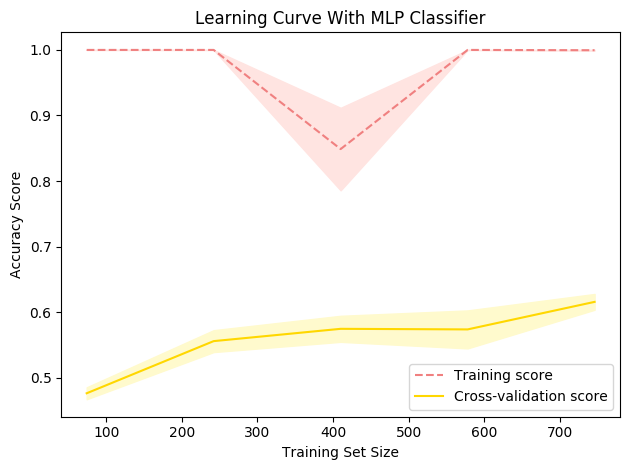

In [707]:
# Original NN
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
wine_mlp = MLPClassifier(random_state=5, max_iter=2000)

wine_mlp.fit(wine_X_train, wine_Y_train)
wine_Y_pred = wine_mlp.predict(wine_X_test)
wine_mlp_accuracy = accuracy_score(wine_Y_test, wine_Y_pred)
print("Accuracy w/o Tuning: ", wine_mlp_accuracy)

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
param_grid = {"hidden_layer_sizes": [400,500], "learning_rate_init": [0.0001, 0.001, 0.005, 0.01], "activation": ['relu'],}
wine_mlp_tuned = GridSearchCV(wine_mlp, param_grid, scoring='accuracy', cv=3)
wine_mlp_tuned.fit(wine_X_train, wine_Y_train)
best_params = wine_mlp_tuned.best_params_
best_estimator = wine_mlp_tuned.best_estimator_
print("Best Params: ", best_params, best_estimator)

final_wine_mlp = best_estimator
final_wine_mlp.fit(wine_X_train, wine_Y_train)
wine_Y_pred = final_wine_mlp.predict(wine_X_test)
final_wine_mlp_accuracy = accuracy_score(wine_Y_test, wine_Y_pred)
print("Accuracy w/ Tuning: ", final_wine_mlp_accuracy)

create_learning_curve(final_wine_mlp, wine_X_train, wine_Y_train, "MLP Classifier")

In [708]:
# Original NN
fit_time_start = time.time()
final_wine_mlp.fit(wine_X_train, wine_Y_train)
fit_time_end = time.time()
wine_fit_time = fit_time_end - fit_time_start
print("Original Fit Time: ", wine_fit_time)

predict_time_start = time.time()
wine_Y_pred_test = final_wine_mlp.predict(wine_X_test)
predict_time_end = time.time()
wine_predict_time = predict_time_end - predict_time_start
print("Original Predict Time: ", wine_predict_time)

wine_Y_pred_train = final_wine_mlp.predict(wine_X_train)


final_wine_mlp_train_accuracy = accuracy_score(wine_Y_train, wine_Y_pred_train)
print("Training Accuracy w/ Tuning: ", final_wine_mlp_train_accuracy)
final_wine_mlp_test_accuracy = accuracy_score(wine_Y_test, wine_Y_pred_test)
print("Testing Accuracy w/ Tuning: ", final_wine_mlp_test_accuracy)

Original Fit Time:  23.321712017059326
Original Predict Time:  0.0021491050720214844
Training Accuracy w/ Tuning:  1.0
Testing Accuracy w/ Tuning:  0.66875


/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

Best Params:  {'activation': 'relu', 'hidden_layer_sizes': 400, 'learning_rate_init': 0.0001} MLPClassifier(hidden_layer_sizes=400, learning_rate_init=0.0001, max_iter=2000,
              random_state=5)


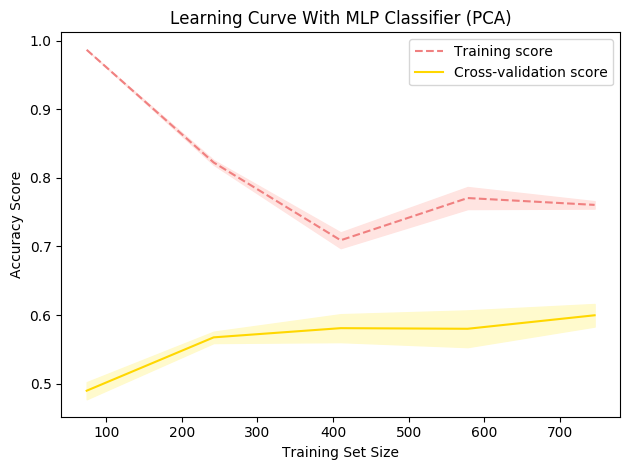

PCA Fit Time:  30.43880605697632
PCA Predict Time:  0.001461029052734375
Training Accuracy w/ Tuning:  0.7426273458445041
Testing Accuracy w/ Tuning:  0.5291666666666667


/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [709]:
# PCA NN
wine_mlp = MLPClassifier(random_state=random_state, max_iter=2000)

new_X_train = PCA(n_components=8, random_state=random_state).fit_transform(wine_X_train)
new_X_test = PCA(n_components=8, random_state=random_state).fit_transform(wine_X_test)

param_grid = {"hidden_layer_sizes": [400], "learning_rate_init": [0.0001, 0.001, 0.005, 0.01], "activation": ['relu']}
wine_mlp_tuned = GridSearchCV(wine_mlp, param_grid, scoring='accuracy', cv=3)
wine_mlp_tuned.fit(new_X_train, wine_Y_train)
best_params = wine_mlp_tuned.best_params_
best_estimator = wine_mlp_tuned.best_estimator_
print("Best Params: ", best_params, best_estimator)

pca_wine_mlp = best_estimator
create_learning_curve(pca_wine_mlp, new_X_train, wine_Y_train, "MLP Classifier (PCA)")
fit_time_start = time.time()
pca_wine_mlp.fit(new_X_train, wine_Y_train)
fit_time_end = time.time()
wine_fit_time = fit_time_end - fit_time_start
print("PCA Fit Time: ", wine_fit_time)

predict_time_start = time.time()
wine_Y_pred_test = pca_wine_mlp.predict(new_X_test)
predict_time_end = time.time()
wine_predict_time = predict_time_end - predict_time_start
print("PCA Predict Time: ", wine_predict_time)

wine_Y_pred_train = pca_wine_mlp.predict(new_X_train)


final_wine_mlp_train_accuracy = accuracy_score(wine_Y_train, wine_Y_pred_train)
print("Training Accuracy w/ Tuning: ", final_wine_mlp_train_accuracy)
final_wine_mlp_test_accuracy = accuracy_score(wine_Y_test, wine_Y_pred_test)
print("Testing Accuracy w/ Tuning: ", final_wine_mlp_test_accuracy)

/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

Best Params:  {'activation': 'relu', 'hidden_layer_sizes': 500, 'learning_rate_init': 0.001} MLPClassifier(hidden_layer_sizes=500, max_iter=2000, random_state=5)


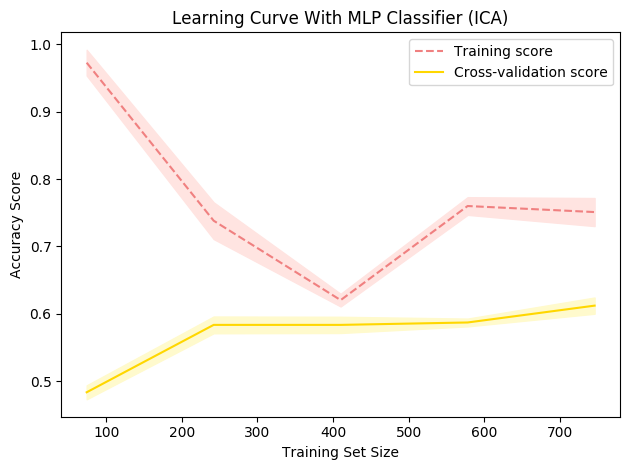

ICA Fit Time:  30.031946182250977
ICA Predict Time:  0.0021088123321533203
Training Accuracy w/ Tuning:  0.7381590705987489
Testing Accuracy w/ Tuning:  0.29375


/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

In [721]:
# ICA NN
wine_mlp = MLPClassifier(random_state=random_state, max_iter=2000)

new_X_train = FastICA(n_components=10, random_state=random_state).fit_transform(wine_X_train)
new_X_test = FastICA(n_components=10, random_state=random_state).fit_transform(wine_X_test)

param_grid = {"hidden_layer_sizes": [400, 500], "learning_rate_init": [0.0001, 0.001, 0.005, 0.01], "activation": ['relu']}
wine_mlp_tuned = GridSearchCV(wine_mlp, param_grid, scoring='accuracy', cv=3)
wine_mlp_tuned.fit(new_X_train, wine_Y_train)
best_params = wine_mlp_tuned.best_params_
best_estimator = wine_mlp_tuned.best_estimator_
print("Best Params: ", best_params, best_estimator)

ica_wine_mlp = best_estimator
create_learning_curve(ica_wine_mlp, new_X_train, wine_Y_train, "MLP Classifier (ICA)")
fit_time_start = time.time()
ica_wine_mlp.fit(new_X_train, wine_Y_train)
fit_time_end = time.time()
wine_fit_time = fit_time_end - fit_time_start
print("ICA Fit Time: ", wine_fit_time)

predict_time_start = time.time()
wine_Y_pred_test = ica_wine_mlp.predict(new_X_test)
predict_time_end = time.time()
wine_predict_time = predict_time_end - predict_time_start
print("ICA Predict Time: ", wine_predict_time)

wine_Y_pred_train = ica_wine_mlp.predict(new_X_train)

final_wine_mlp_train_accuracy = accuracy_score(wine_Y_train, wine_Y_pred_train)
print("Training Accuracy w/ Tuning: ", final_wine_mlp_train_accuracy)
final_wine_mlp_test_accuracy = accuracy_score(wine_Y_test, wine_Y_pred_test)
print("Testing Accuracy w/ Tuning: ", final_wine_mlp_test_accuracy)

/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

Best Params:  {'activation': 'relu', 'hidden_layer_sizes': 400, 'learning_rate_init': 0.005} MLPClassifier(hidden_layer_sizes=400, learning_rate_init=0.005, max_iter=2000,
              random_state=5)


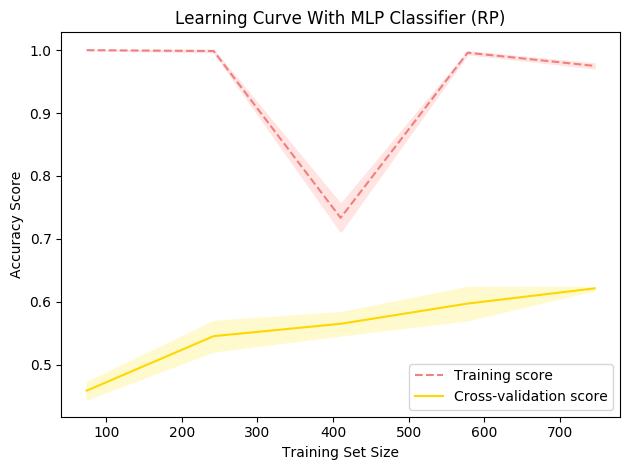

RP Fit Time:  4.240092754364014
RP Predict Time:  0.0016510486602783203
Training Accuracy w/ Tuning:  0.936550491510277
Testing Accuracy w/ Tuning:  0.625


In [711]:
# RP NN
wine_mlp = MLPClassifier(random_state=random_state, max_iter=2000)

new_X_train = GaussianRandomProjection(n_components=10, random_state=random_state).fit_transform(wine_X_train)
new_X_test = GaussianRandomProjection(n_components=10, random_state=random_state).fit_transform(wine_X_test)

param_grid = {"hidden_layer_sizes": [400, 500], "learning_rate_init": [0.0001, 0.001, 0.005, 0.01], "activation": ['relu']}
wine_mlp_tuned = GridSearchCV(wine_mlp, param_grid, scoring='accuracy', cv=3)
wine_mlp_tuned.fit(new_X_train, wine_Y_train)
best_params = wine_mlp_tuned.best_params_
best_estimator = wine_mlp_tuned.best_estimator_
print("Best Params: ", best_params, best_estimator)

rp_wine_mlp = best_estimator
create_learning_curve(rp_wine_mlp, new_X_train, wine_Y_train, "MLP Classifier (RP)")
fit_time_start = time.time()
rp_wine_mlp.fit(new_X_train, wine_Y_train)
fit_time_end = time.time()
wine_fit_time = fit_time_end - fit_time_start
print("RP Fit Time: ", wine_fit_time)

predict_time_start = time.time()
wine_Y_pred_test = rp_wine_mlp.predict(new_X_test)
predict_time_end = time.time()
wine_predict_time = predict_time_end - predict_time_start
print("RP Predict Time: ", wine_predict_time)

wine_Y_pred_train = rp_wine_mlp.predict(new_X_train)

final_wine_mlp_train_accuracy = accuracy_score(wine_Y_train, wine_Y_pred_train)
print("Training Accuracy w/ Tuning: ", final_wine_mlp_train_accuracy)
final_wine_mlp_test_accuracy = accuracy_score(wine_Y_test, wine_Y_pred_test)
print("Testing Accuracy w/ Tuning: ", final_wine_mlp_test_accuracy)

Best Params:  {'activation': 'relu', 'hidden_layer_sizes': 500, 'learning_rate_init': 0.0001} MLPClassifier(hidden_layer_sizes=500, learning_rate_init=0.0001, max_iter=2000,
              random_state=5)


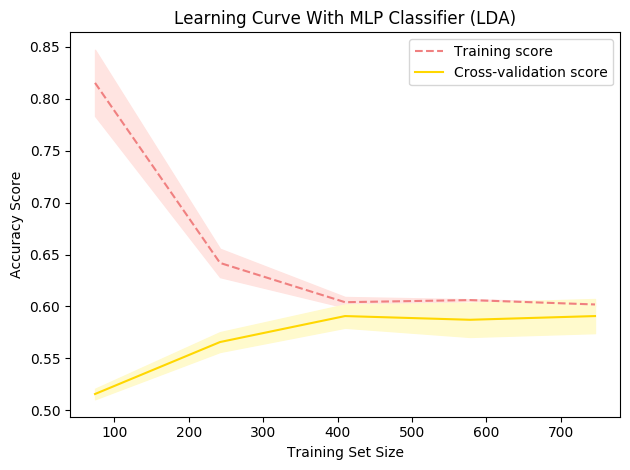

LDA Fit Time:  8.479454040527344
LDA Predict Time:  0.0016477108001708984
Training Accuracy w/ Tuning:  0.5969615728328865
Testing Accuracy w/ Tuning:  0.6229166666666667


In [712]:
# LDA NN
wine_mlp = MLPClassifier(random_state=random_state, max_iter=2000)

new_X_train = LinearDiscriminantAnalysis(n_components=3).fit_transform(wine_X_train, wine_Y_train)
new_X_test = LinearDiscriminantAnalysis(n_components=3).fit_transform(wine_X_test, wine_Y_test)

param_grid = {"hidden_layer_sizes": [400, 500], "learning_rate_init": [0.0001, 0.001, 0.005, 0.01], "activation": ['relu']}
wine_mlp_tuned = GridSearchCV(wine_mlp, param_grid, scoring='accuracy', cv=3)
wine_mlp_tuned.fit(new_X_train, wine_Y_train)
best_params = wine_mlp_tuned.best_params_
best_estimator = wine_mlp_tuned.best_estimator_
print("Best Params: ", best_params, best_estimator)

lda_wine_mlp = best_estimator
create_learning_curve(lda_wine_mlp, new_X_train, wine_Y_train, "MLP Classifier (LDA)")
fit_time_start = time.time()
lda_wine_mlp.fit(new_X_train, wine_Y_train)
fit_time_end = time.time()
wine_fit_time = fit_time_end - fit_time_start
print("LDA Fit Time: ", wine_fit_time)

predict_time_start = time.time()
wine_Y_pred_test = lda_wine_mlp.predict(new_X_test)
predict_time_end = time.time()
wine_predict_time = predict_time_end - predict_time_start
print("LDA Predict Time: ", wine_predict_time)

wine_Y_pred_train = lda_wine_mlp.predict(new_X_train)


final_wine_mlp_train_accuracy = accuracy_score(wine_Y_train, wine_Y_pred_train)
print("Training Accuracy w/ Tuning: ", final_wine_mlp_train_accuracy)
final_wine_mlp_test_accuracy = accuracy_score(wine_Y_test, wine_Y_pred_test)
print("Testing Accuracy w/ Tuning: ", final_wine_mlp_test_accuracy)

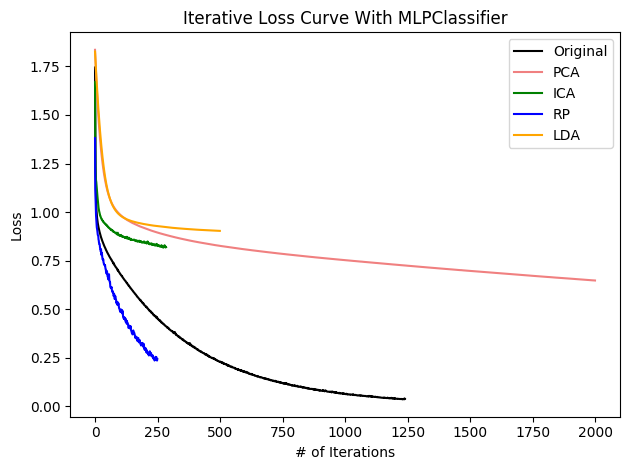

In [713]:
plt.title("Iterative Loss Curve With MLPClassifier")
plt.xlabel("# of Iterations")
plt.ylabel("Loss")
plt.tight_layout()

plt.plot(final_wine_mlp.loss_curve_, color="black", label="Original")
plt.plot(pca_wine_mlp.loss_curve_, color="lightcoral", label="PCA")
plt.plot(ica_wine_mlp.loss_curve_, color="green", label="ICA")
plt.plot(rp_wine_mlp.loss_curve_, color="blue", label="RP")
plt.plot(lda_wine_mlp.loss_curve_, color="orange", label="LDA")

plt.tight_layout()
plt.legend(loc="best")
plt.show()

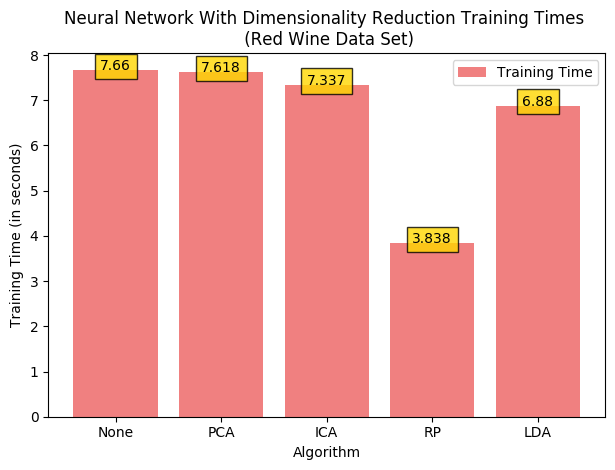

In [719]:
# https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html?highlight=loss+curve
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(facecolor = 'gold', alpha =.8))

dim_redu = ["None", "PCA", "ICA", "RP", "LDA"]
wine_fit_times = [7.660, 7.618, 7.337, 3.838, 6.880]
plt.bar(dim_redu, wine_fit_times, color="lightcoral", label="Training Time")
addlabels(dim_redu, wine_fit_times)
plt.title("Neural Network With Dimensionality Reduction Training Times \n (Red Wine Data Set)")
plt.xlabel("Algorithm")
plt.ylabel("Training Time (in seconds)")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [714]:
# EM
em = GaussianMixture(n_components=5, random_state=random_state)
em_predicted_labels_train = em.fit(wine_X_train).predict(wine_X_train)
em_predicted_labels_test = em.fit(wine_X_test).predict(wine_X_test)

em_wine_X_train = np.column_stack((wine_X_train, em_predicted_labels_train))
print(em_wine_X_train.shape)

em_wine_X_test = np.column_stack((wine_X_test, em_predicted_labels_test))
print(em_wine_X_test.shape)

(1119, 12)
(480, 12)


/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

Best Params:  {'activation': 'relu', 'hidden_layer_sizes': 400, 'learning_rate_init': 0.003} MLPClassifier(hidden_layer_sizes=400, learning_rate_init=0.003, max_iter=2000,
              random_state=5)


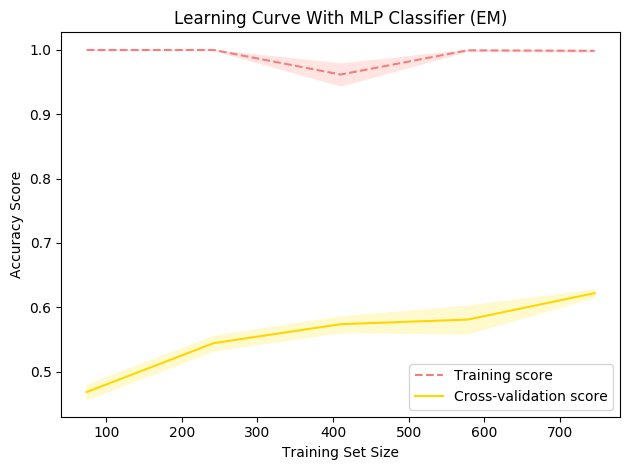

EM Fit Time:  6.111181974411011
EM Predict Time:  0.0021240711212158203
Training Accuracy w/ Tuning:  0.9973190348525469
Testing Accuracy w/ Tuning:  0.55625


In [715]:
new_X_train = em_wine_X_train
new_X_test = em_wine_X_test

wine_mlp = MLPClassifier(random_state=random_state, max_iter=2000)

param_grid = {"hidden_layer_sizes": [400, 500], "learning_rate_init": [0.0001, 0.0005, 0.001, 0.003, 0.01], "activation": ['relu']}
wine_mlp_tuned = GridSearchCV(wine_mlp, param_grid, scoring='accuracy', cv=3)
wine_mlp_tuned.fit(new_X_train, wine_Y_train)
best_params = wine_mlp_tuned.best_params_
best_estimator = wine_mlp_tuned.best_estimator_
print("Best Params: ", best_params, best_estimator)

em_wine_mlp = best_estimator
create_learning_curve(em_wine_mlp, new_X_train, wine_Y_train, "MLP Classifier (EM)")
fit_time_start = time.time()
em_wine_mlp.fit(new_X_train, wine_Y_train)
fit_time_end = time.time()
wine_fit_time = fit_time_end - fit_time_start
print("EM Fit Time: ", wine_fit_time)

predict_time_start = time.time()
wine_Y_pred_test = em_wine_mlp.predict(new_X_test)
predict_time_end = time.time()
wine_predict_time = predict_time_end - predict_time_start
print("EM Predict Time: ", wine_predict_time)

wine_Y_pred_train = em_wine_mlp.predict(new_X_train)

final_wine_mlp_train_accuracy = accuracy_score(wine_Y_train, wine_Y_pred_train)
print("Training Accuracy w/ Tuning: ", final_wine_mlp_train_accuracy)
final_wine_mlp_test_accuracy = accuracy_score(wine_Y_test, wine_Y_pred_test)
print("Testing Accuracy w/ Tuning: ", final_wine_mlp_test_accuracy)

In [716]:
# KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans_predicted_labels_train = kmeans.fit(wine_X_train).predict(wine_X_train)
kmeans_predicted_labels_test = kmeans.fit(wine_X_test).predict(wine_X_test)

kmeans_wine_X_train = np.column_stack((wine_X_train, kmeans_predicted_labels_train))
print(kmeans_wine_X_train.shape)

kmeans_wine_X_test = np.column_stack((wine_X_test, kmeans_predicted_labels_test))
print(kmeans_wine_X_test.shape)

(1119, 12)
(480, 12)


/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/aashiamehta/opt/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

Best Params:  {'activation': 'relu', 'hidden_layer_sizes': 500, 'learning_rate_init': 0.003} MLPClassifier(hidden_layer_sizes=500, learning_rate_init=0.003, max_iter=2000,
              random_state=5)


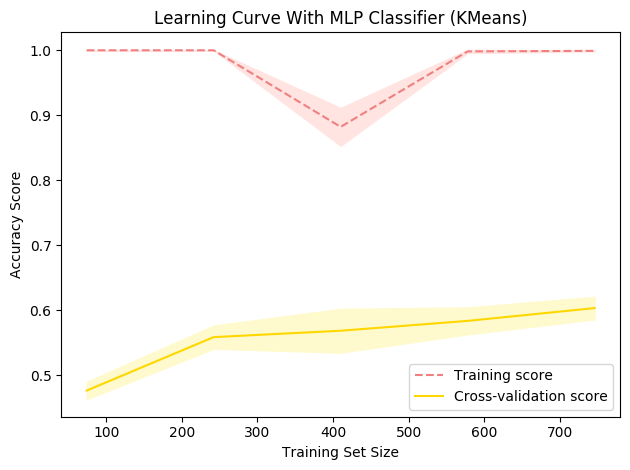

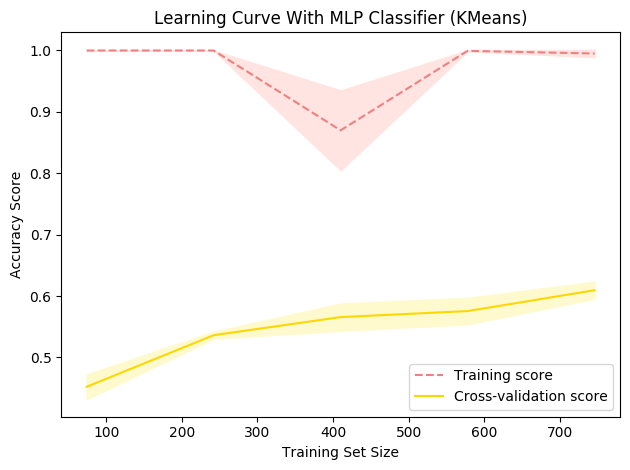

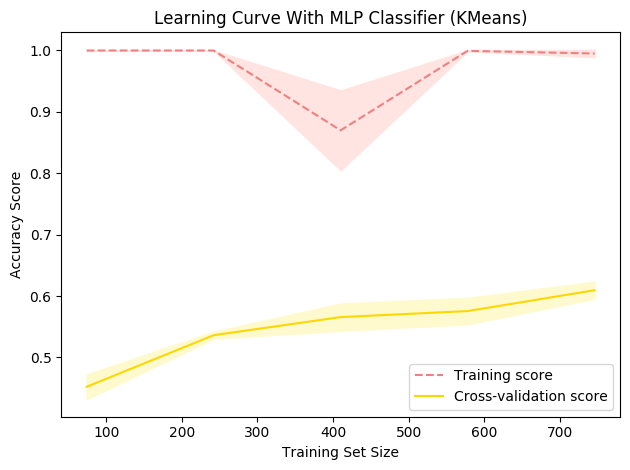

KMeans Fit Time:  7.022823810577393
KMeans Predict Time:  0.002007007598876953
Training Accuracy w/ Tuning:  0.9749776586237712
Testing Accuracy w/ Tuning:  0.5604166666666667


In [720]:
new_X_train = kmeans_wine_X_train
new_X_test = kmeans_wine_X_test

wine_mlp = MLPClassifier(random_state=random_state, max_iter=2000)

param_grid = {"hidden_layer_sizes": [400, 500], "learning_rate_init": [0.0001, 0.0005, 0.001, 0.003, 0.01], "activation": ['relu']}
wine_mlp_tuned = GridSearchCV(wine_mlp, param_grid, scoring='accuracy', cv=3)
wine_mlp_tuned.fit(new_X_train, wine_Y_train)
best_params = wine_mlp_tuned.best_params_
best_estimator = wine_mlp_tuned.best_estimator_
print("Best Params: ", best_params, best_estimator)

kmeans_wine_mlp = best_estimator
create_learning_curve(kmeans_wine_mlp, new_X_train, wine_Y_train, "MLP Classifier (KMeans)")
fit_time_start = time.time()
kmeans_wine_mlp.fit(new_X_train, wine_Y_train)
fit_time_end = time.time()
wine_fit_time = fit_time_end - fit_time_start
print("KMeans Fit Time: ", wine_fit_time)

predict_time_start = time.time()
wine_Y_pred_test = kmeans_wine_mlp.predict(new_X_test)
predict_time_end = time.time()
wine_predict_time = predict_time_end - predict_time_start
print("KMeans Predict Time: ", wine_predict_time)

wine_Y_pred_train = kmeans_wine_mlp.predict(new_X_train)

final_wine_mlp_train_accuracy = accuracy_score(wine_Y_train, wine_Y_pred_train)
print("Training Accuracy w/ Tuning: ", final_wine_mlp_train_accuracy)
final_wine_mlp_test_accuracy = accuracy_score(wine_Y_test, wine_Y_pred_test)
print("Testing Accuracy w/ Tuning: ", final_wine_mlp_test_accuracy)

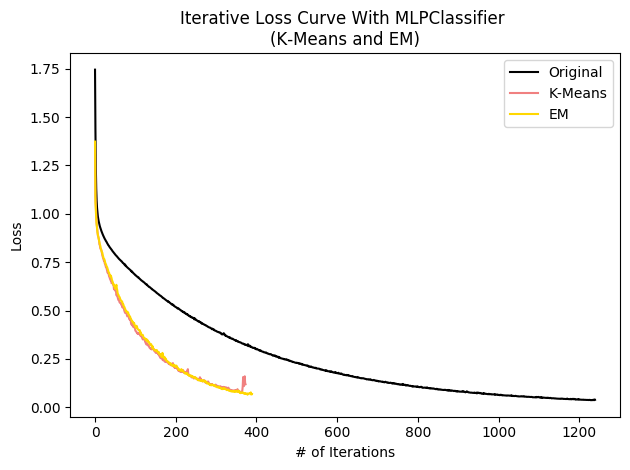

In [718]:
plt.title("Iterative Loss Curve With MLPClassifier \n(K-Means and EM)")
plt.xlabel("# of Iterations")
plt.ylabel("Loss")
plt.tight_layout()

plt.plot(final_wine_mlp.loss_curve_, color="black", label="Original")
plt.plot(kmeans_wine_mlp.loss_curve_, color="lightcoral", label="K-Means")
plt.plot(em_wine_mlp.loss_curve_, color="gold", label="EM")

plt.tight_layout()
plt.legend(loc="best")
plt.show()